In [1]:
import matplotlib
# matplotlib.use('Agg') # when running on cori
import matplotlib.pyplot as plt
plt.style.use('../nfuad.mpl')
from matplotlib.colors import LogNorm

import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

import pygama.math.utils as pgu
from pygama.flow import DataGroup
import pygama.lgdo as lh5
import pygama.math.histogram as pgh
import pygama.math.peak_fitting as pgf

import h5py
import random


dg = DataGroup('/global/homes/f/fnafis/krstc/krstc.json', load=True)

lh5_dir = dg.lh5_dir #if:user, then:dg.lh5_user_dir; else:dg.lh5_dir
dsp_list = lh5_dir + dg.fileDB['dsp_path'] + '/' + dg.fileDB['dsp_file']

#print all columns of dg
print(dg.fileDB.columns)
dg.fileDB


Index(['YYYY', 'cycle', 'daq_dir', 'daq_file', 'dd', 'dsp_id', 'mm', 'run',
       'runtype', 'skip', 'unique_key', 'raw_file', 'raw_path', 'dsp_file',
       'dsp_path', 'hit_file', 'hit_path', 'startTime', 'threshold', 'daq_gb',
       'stopTime', 'runtime'],
      dtype='object')


,YYYY,cycle,daq_dir,daq_file,dd,dsp_id,mm,run,runtype,skip,...,raw_path,dsp_file,dsp_path,hit_file,hit_path,startTime,threshold,daq_gb,stopTime,runtime
0,2020,2019,/2020/06/Data,2020-6-11-KrSTCRun2019,11,1.0,6,0.0,bkg,False,...,/raw,krstc_run0_cyc2019_dsp.lh5,/dsp,krstc_run0_cyc2019_hit.lh5,/hit,1.591914e+09,100.0,1.061043,1.591915e+09,13.714247
1,2020,2020,/2020/06/Data,2020-6-11-KrSTCRun2020,11,1.0,6,0.0,bkg,False,...,/raw,krstc_run0_cyc2020_dsp.lh5,/dsp,krstc_run0_cyc2020_hit.lh5,/hit,1.591915e+09,100.0,2.002383,1.591917e+09,25.816316
2,2020,2021,/2020/06/Data,2020-6-11-KrSTCRun2021,11,1.0,6,0.0,bkg,False,...,/raw,krstc_run0_cyc2021_dsp.lh5,/dsp,krstc_run0_cyc2021_hit.lh5,/hit,1.591917e+09,100.0,2.035477,1.591917e+09,12.557345
3,2020,2022,/2020/06/Data,2020-6-11-KrSTCRun2022,11,1.0,6,0.0,bkg,False,...,/raw,krstc_run0_cyc2022_dsp.lh5,/dsp,krstc_run0_cyc2022_hit.lh5,/hit,1.591917e+09,100.0,2.058530,1.591917e+09,1.206728
4,2020,2023,/2020/06/Data,2020-6-11-KrSTCRun2023,11,1.0,6,0.0,bkg,False,...,/raw,krstc_run0_cyc2023_dsp.lh5,/dsp,krstc_run0_cyc2023_hit.lh5,/hit,1.591917e+09,100.0,2.088009,1.591918e+09,1.213570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,2022,2599,/2022/04/Data,2022-4-15-KrSTCRun2599,15,4.0,4,38.0,bkg,False,...,/raw,krstc_run38_cyc2599_dsp.lh5,/dsp,krstc_run38_cyc2599_hit.lh5,/hit,1.650048e+09,100.0,1.345234,1.650049e+09,19.170977
581,2022,2600,/2022/04/Data,2022-4-15-KrSTCRun2600,15,4.0,4,39.0,bkg,False,...,/raw,krstc_run39_cyc2600_dsp.lh5,/dsp,krstc_run39_cyc2600_hit.lh5,/hit,1.650049e+09,100.0,2.007099,1.650051e+09,28.685735
582,2022,2601,/2022/04/Data,2022-4-15-KrSTCRun2601,15,4.0,4,39.0,bkg,False,...,/raw,krstc_run39_cyc2601_dsp.lh5,/dsp,krstc_run39_cyc2601_hit.lh5,/hit,1.650051e+09,100.0,2.005029,1.650052e+09,28.607619
583,2022,2602,/2022/04/Data,2022-4-15-KrSTCRun2602,15,4.0,4,39.0,bkg,False,...,/raw,krstc_run39_cyc2602_dsp.lh5,/dsp,krstc_run39_cyc2602_hit.lh5,/hit,1.650052e+09,100.0,2.006409,1.650054e+09,28.940240


In [2]:
dg.fileDB[dg.fileDB['runtype']=='puls']

,YYYY,cycle,daq_dir,daq_file,dd,dsp_id,mm,run,runtype,skip,...,raw_path,dsp_file,dsp_path,hit_file,hit_path,startTime,threshold,daq_gb,stopTime,runtime
81,2020,2100,/2020/06/Data,2020-6-23-KrSTCRun2100,23,2.0,6,6.0,puls,False,...,/raw,krstc_run6_cyc2100_dsp.lh5,/dsp,krstc_run6_cyc2100_hit.lh5,/hit,1.592944e+09,100.0,0.122003,1.592944e+09,0.331862
82,2020,2101,/2020/06/Data,2020-6-23-KrSTCRun2101,23,2.0,6,6.0,puls,False,...,/raw,krstc_run6_cyc2101_dsp.lh5,/dsp,krstc_run6_cyc2101_hit.lh5,/hit,1.592944e+09,100.0,0.122003,1.592944e+09,0.329513
83,2020,2102,/2020/06/Data,2020-6-23-KrSTCRun2102,23,2.0,6,6.0,puls,False,...,/raw,krstc_run6_cyc2102_dsp.lh5,/dsp,krstc_run6_cyc2102_hit.lh5,/hit,1.592944e+09,100.0,0.094660,1.592944e+09,0.333890
84,2020,2103,/2020/06/Data,2020-6-23-KrSTCRun2103,23,2.0,6,6.0,puls,False,...,/raw,krstc_run6_cyc2103_dsp.lh5,/dsp,krstc_run6_cyc2103_hit.lh5,/hit,1.592944e+09,100.0,0.088350,1.592944e+09,0.328668
85,2020,2104,/2020/06/Data,2020-6-23-KrSTCRun2104,23,2.0,6,6.0,puls,False,...,/raw,krstc_run6_cyc2104_dsp.lh5,/dsp,krstc_run6_cyc2104_hit.lh5,/hit,1.592944e+09,100.0,0.117796,1.592944e+09,0.333033
86,2020,2105,/2020/06/Data,2020-6-23-KrSTCRun2105,23,2.0,6,6.0,puls,False,...,/raw,krstc_run6_cyc2105_dsp.lh5,/dsp,krstc_run6_cyc2105_hit.lh5,/hit,1.592944e+09,100.0,0.088350,1.592944e+09,0.328682
87,2020,2106,/2020/06/Data,2020-6-23-KrSTCRun2106,23,2.0,6,6.0,puls,False,...,/raw,krstc_run6_cyc2106_dsp.lh5,/dsp,krstc_run6_cyc2106_hit.lh5,/hit,1.592944e+09,100.0,0.077833,1.592944e+09,0.333610
88,2020,2107,/2020/06/Data,2020-6-23-KrSTCRun2107,23,2.0,6,6.0,puls,False,...,/raw,krstc_run6_cyc2107_dsp.lh5,/dsp,krstc_run6_cyc2107_hit.lh5,/hit,1.592944e+09,100.0,0.056800,1.592944e+09,0.331348
89,2020,2108,/2020/06/Data,2020-6-23-KrSTCRun2108,23,2.0,6,6.0,puls,False,...,/raw,krstc_run6_cyc2108_dsp.lh5,/dsp,krstc_run6_cyc2108_hit.lh5,/hit,1.592944e+09,100.0,0.061007,1.592944e+09,0.334124
90,2020,2109,/2020/06/Data,2020-6-23-KrSTCRun2109,23,2.0,6,6.0,puls,False,...,/raw,krstc_run6_cyc2109_dsp.lh5,/dsp,krstc_run6_cyc2109_hit.lh5,/hit,1.592944e+09,100.0,0.056800,1.592944e+09,0.322292


In [3]:
dg.fileDB[dg.fileDB.runtype=='puls'].runtime.sum()

17.173037132500003

In [ ]:
sample_runs = {
    'bkg':{'cycle_range':[2225,2279]},
    'kry':{'cycle_range':[2280,2331]},
    'Ba133':{'cycle_range':[2332,2334]},
    'puls':{'cycle_range':[2335,2347]}
}
sample_runs['bkg']

# calculate runtime for each sample
for sample in sample_runs:
    sample_runs[sample]['runtime']=dg.fileDB[dg.fileDB['runtype']==sample].runtime.sum()
pd.DataFrame(sample_runs)


,bkg,kry,Ba133,puls
cycle_range,"[2225, 2279]","[2280, 2331]","[2332, 2334]","[2335, 2347]"
runtime,5285.994885,6930.303437,63.122943,17.173037


In [ ]:
dsp_list[0]

'/global/cfs/cdirs/m2676/data/krstc/LH5/dsp/krstc_run0_cyc2019_dsp.lh5'

In [ ]:
calibration_consts = [0.431,0.132]
parameters = ['trapEmax', 'bl','AoE', 'dcr', 'ToE','triEmax', 'timestamp']


hit_lists = {
    'bkg':dsp_list[sample_runs['bkg']['cycle_range'][0]-2019:sample_runs['bkg']['cycle_range'][1]-2019+1],
    'kry':dsp_list[sample_runs['kry']['cycle_range'][0]-2019:sample_runs['kry']['cycle_range'][1]-2019+1],
    'Ba133':dsp_list[sample_runs['Ba133']['cycle_range'][0]-2019:sample_runs['Ba133']['cycle_range'][1]-2019+1],
    'puls':dsp_list[sample_runs['puls']['cycle_range'][0]-2019:sample_runs['puls']['cycle_range'][1]-2019+1]
}



dsp = {

    'bkg':lh5.load_dfs(hit_lists['bkg'], parameters, 'ORSIS3302DecoderForEnergy/dsp'),
    'kry':lh5.load_dfs(hit_lists['kry'], parameters, 'ORSIS3302DecoderForEnergy/dsp'),
    'Ba133':lh5.load_dfs(hit_lists['Ba133'], parameters, 'ORSIS3302DecoderForEnergy/dsp'),
    'puls':lh5.load_dfs(hit_lists['puls'], parameters, 'ORSIS3302DecoderForEnergy/dsp')
}


dsp['bkg']['trapEmax_cal'] = np.polyval(calibration_consts, dsp['bkg']['trapEmax'])
dsp['kry']['trapEmax_cal'] = np.polyval(calibration_consts, dsp['kry']['trapEmax'])
dsp['Ba133']['trapEmax_cal'] = np.polyval(calibration_consts, dsp['Ba133']['trapEmax'])
dsp['puls']['trapEmax_cal'] = np.polyval(calibration_consts, dsp['puls']['trapEmax'])

dsp['bkg']

,trapEmax,bl,AoE,dcr,ToE,triEmax,timestamp,trapEmax_cal
0,254.190109,58100.636719,0.069321,0.543452,0.629963,160.130341,3315024,109.687943
1,775.259216,58099.328125,0.068577,0.419149,0.621490,481.816162,3713733,334.268707
2,507.551636,58100.097656,0.064704,0.524397,0.595111,302.049683,4490709,218.886749
3,557.235779,58093.195312,0.081543,0.605301,0.749283,417.527435,4715770,240.300629
4,533.966919,58099.695312,0.070674,0.578300,0.635385,339.274628,6958394,230.271744
...,...,...,...,...,...,...,...,...
5641762,2595.072998,58096.230469,0.058104,0.493177,0.546168,1417.346436,77091058939,1118.608398
5641763,1.628434,58103.753906,1.350821,-0.383568,4.545971,7.402814,77091813197,0.833855
5641764,533.597839,58103.898438,0.067369,0.377049,0.626648,334.377808,77093439530,230.112671
5641765,372.359680,58100.406250,0.062658,0.397533,0.573225,213.445770,77093917044,160.619019


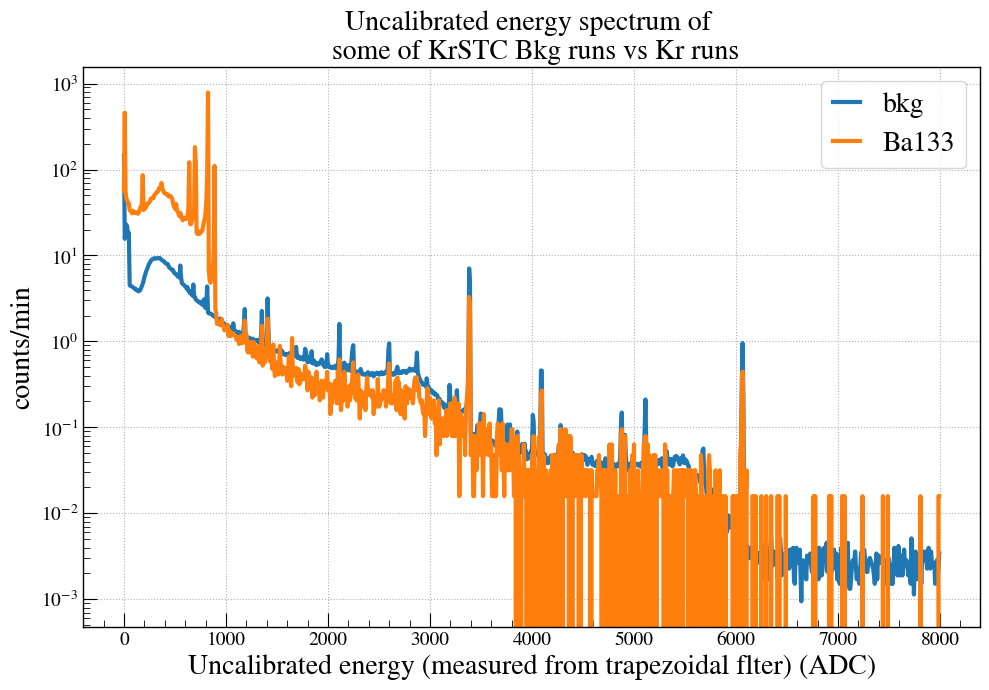

In [ ]:
# plot trapEmax spectrum for background with runtime normalization

range = (0, 8000)

run = 'bkg'
h,b,v = pgh.get_hist(dsp[run]['trapEmax'], bins=1000, range=range)
h = h/sample_runs[run]['runtime']
plt.plot(b[:-1],h, label=run)
plt.yscale('log')

run = 'Ba133'
h,b,v = pgh.get_hist(dsp[run]['trapEmax'], bins=1000, range=range)

h = h/sample_runs[run]['runtime']
plt.plot(b[:-1],h, label=run)
plt.yscale('log')

plt.title('Uncalibrated energy spectrum of \n some of KrSTC Bkg runs vs Kr runs')

plt.xlabel('Uncalibrated energy (measured from trapezoidal flter) (ADC)')
plt.ylabel('counts/min')
plt.legend()

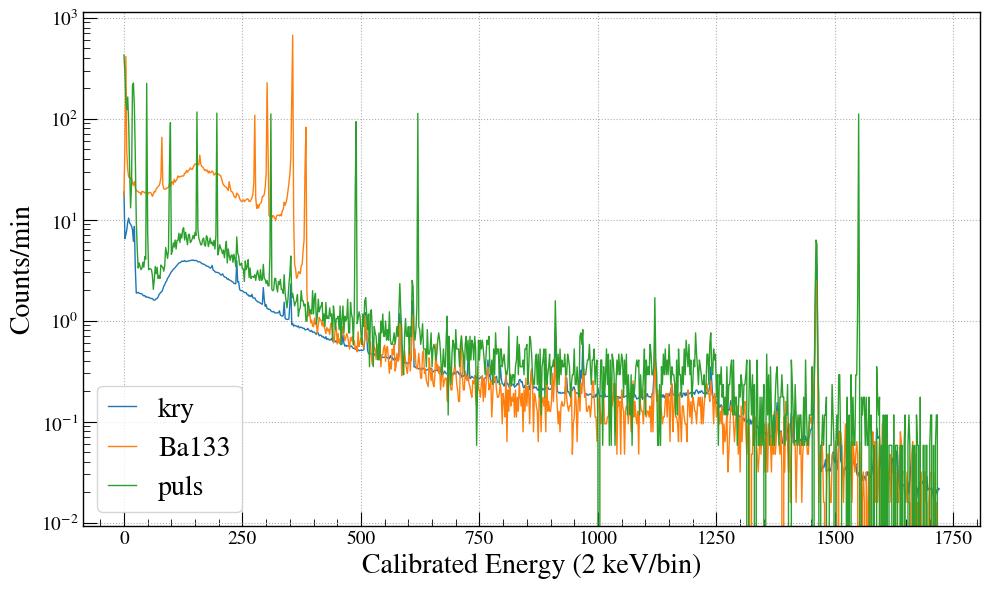

In [ ]:
# plot runtime normalized histograms for each sample
fig, ax = plt.subplots(1,1, figsize=(10,6))
for sample in sample_runs:
    if sample == 'bkg':
        continue
    h,b,v = pgh.get_hist(dsp[sample]['trapEmax_cal'], bins=np.arange(0,1724,2), range=(0,4000))
    h = h/sample_runs[sample]['runtime']
    ax.plot(b[:-1], h, label=sample, linewidth=1)
ax.set_xlabel('Calibrated Energy (2 keV/bin)')
ax.set_ylabel('Counts/min')
ax.legend()
plt.yscale('log')


# RC decay 

[ 1995.08635405    74.51829685 58043.86470361]


Text(0, 0.5, 'Voltage (ADC)')

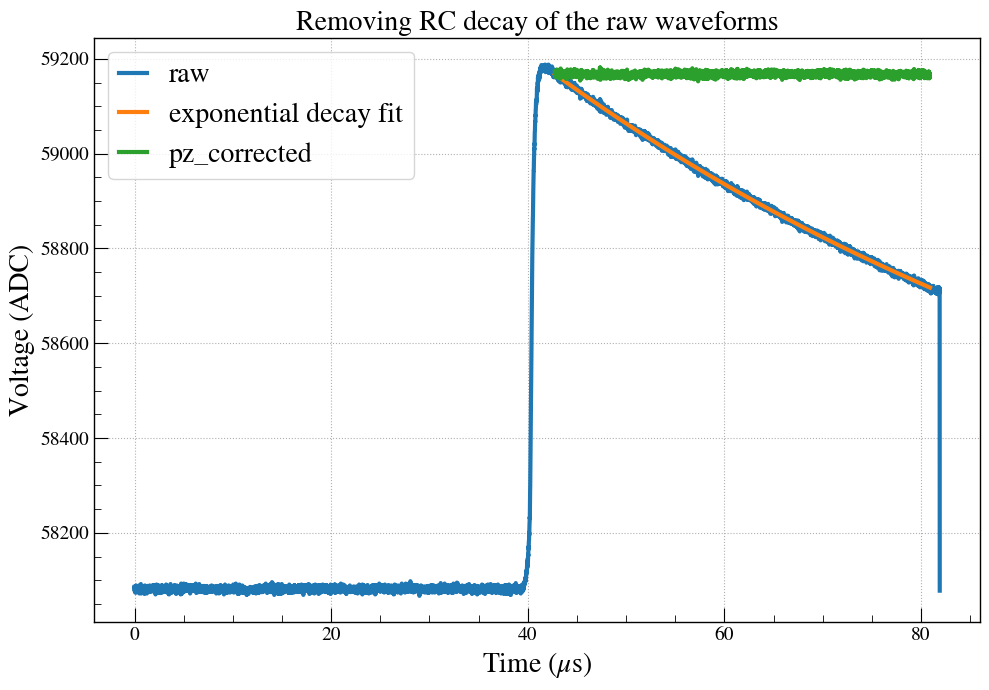

In [ ]:
raw_file_list = lh5_dir + dg.fileDB['raw_path'] + '/' + dg.fileDB['raw_file']

raw_store = lh5.LH5Store()
tb_name_raw = 'ORSIS3302DecoderForEnergy/raw'
#data_raw, nrows = raw_store.read_object(tb_name, f_raw)
data_raw, nrows = raw_store.read_object(tb_name_raw, raw_file_list[0])

bulk_wfs = data_raw['waveform']['values'].nda

wf = bulk_wfs[10]
clockticks = np.arange(0, bulk_wfs.shape[1], 1)
time = clockticks/100 #in us

plt.plot(time, wf, label='raw')


def exp_decay_func(x,A,tau,C):
    return A*np.exp(-x/tau)+C

start_index = np.argmax(wf)+100
end_index = len(wf)-100
wf_to_fit = wf[start_index:end_index]
time_to_fit = time[start_index:end_index]
pars, covs = curve_fit(exp_decay_func, time_to_fit, wf_to_fit, p0=[50,50,0])
y = exp_decay_func(time_to_fit, *pars)
plt.plot(time_to_fit, y, label='exponential decay fit')
print(pars)



# plot exp decay reversed for the waveform
y_max = y[0]
wf_pz_corrected = wf_to_fit + y_max - y
plt.plot(time_to_fit, wf_pz_corrected, label='pz_corrected')

plt.legend()

plt.title('Removing RC decay of the raw waveforms')
plt.xlabel('Time '+r'($\mu$s)')
plt.ylabel('Voltage (ADC)')

# Detector Baseline analysis

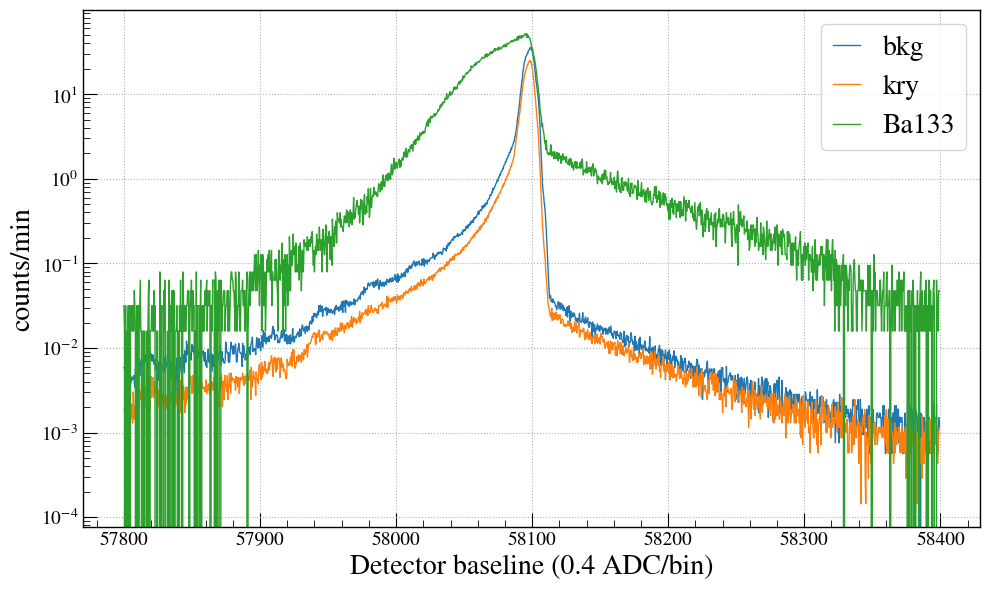

In [ ]:
# plot bl histogram for each sample
fig, ax = plt.subplots(1,1, figsize=(10,6))
range = (57800,58400)
for sample in sample_runs:
    if (sample == 'puls'):
        continue
    h,b,v = pgh.get_hist(dsp[sample]['bl'], bins=np.arange(*range,0.4), range=range)
    h = h/sample_runs[sample]['runtime']
    ax.plot(b[:-1], h, label=sample, linewidth=1)
#plt.xlim(57800,58400)
plt.legend()

plt.xlabel('Detector baseline (0.4 ADC/bin)')
plt.ylabel('counts/min')
plt.yscale('log')


## dt cut to solve baseline issue

In [ ]:
#adding dt to the dataframe in unit of nanoseconds

for sample in sample_runs:
    dsp[sample]['dt'] = 0.0
    dsp[sample]['dt'] = dsp[sample]['timestamp'].diff()/1e5 #converting to ms

dsp['kry']



,trapEmax,bl,AoE,dcr,ToE,triEmax,timestamp,trapEmax_cal,dt
0,519.373901,58096.039062,0.055155,0.503047,0.514681,267.311890,4301619,223.982147,NaN
1,1295.775635,58103.703125,0.058182,0.549198,0.545779,707.207275,5163211,558.611328,8.61592
2,396.951569,58100.730469,0.067850,0.478319,0.621145,246.564514,6977568,171.218124,18.14357
3,143.887939,58097.660156,0.074443,0.653818,0.656258,94.427574,7268250,62.147701,2.90682
4,787.259827,58097.699219,0.043281,0.353680,0.416400,327.814667,7788224,339.440979,5.19974
...,...,...,...,...,...,...,...,...,...
4847789,297.434479,58094.781250,0.066654,0.322261,0.602667,179.253815,1471900211,128.326263,6.82205
4847790,1105.950806,58099.246094,0.067990,0.593772,0.626285,692.640686,1473670451,476.796783,17.70240
4847791,256.718353,58095.285156,0.073302,0.559439,0.644787,165.528702,1475983500,110.777611,23.13049
4847792,373.348450,58098.257812,0.068921,0.321006,0.617696,230.616013,1476990955,161.045181,10.07455


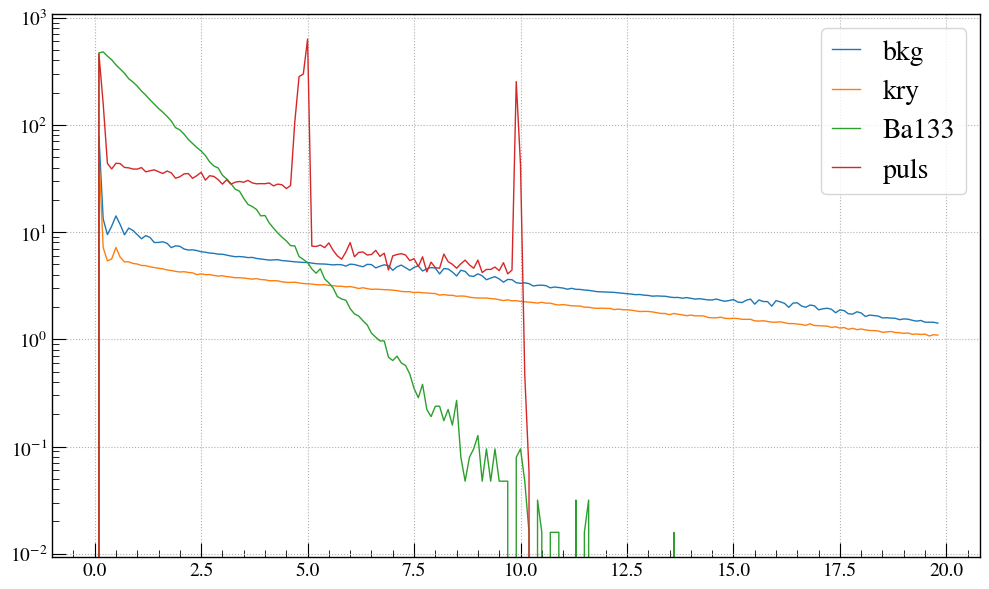

In [ ]:
#plotting dt histogram for each sample
fig, ax = plt.subplots(1,1, figsize=(10,6))
for sample in sample_runs:
    h,b,v = pgh.get_hist(dsp[sample]['dt'], bins=np.arange(0,20,0.1), range=(0,20))
    h = h/sample_runs[sample]['runtime']
    ax.plot(b[:-1], h, label=sample, linewidth=1)
plt.legend()
plt.yscale('log')

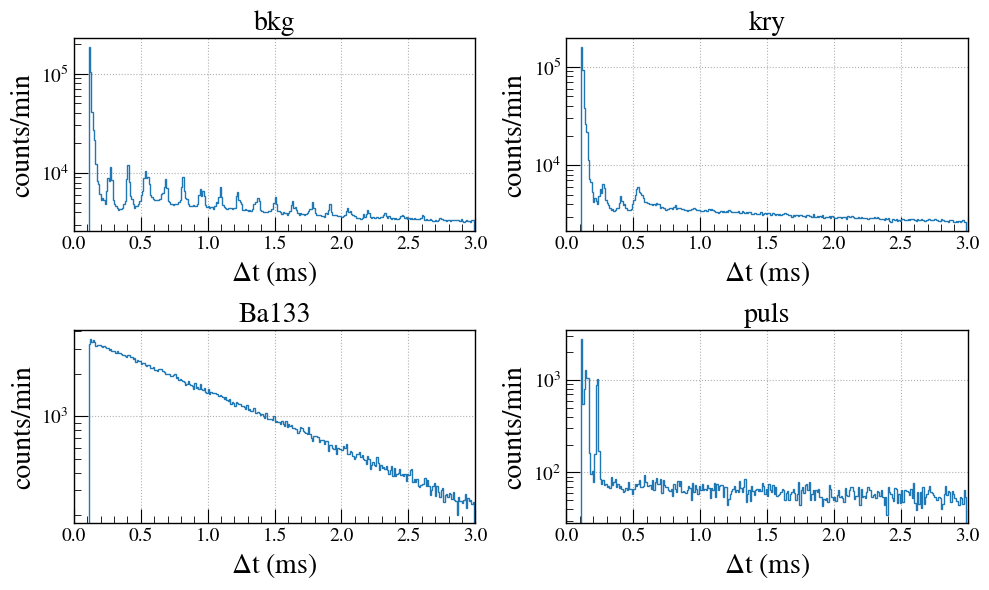

In [ ]:
# plot histogram of dt for each run in sample runs in a 2x2 grid

fig, ax = plt.subplots(2,2, figsize=(10,6))
dt_range = (0,3)
for i, run in enumerate(sample_runs):
    ax[i//2, i%2].hist(dsp[run]['dt'], bins=np.arange(*dt_range,0.01), range=dt_range, histtype='step')
    ax[i//2, i%2].set_title(run)
    ax[i//2, i%2].set_xlabel(r'$\Delta$t (ms)')
    ax[i//2, i%2].set_ylabel('counts/min')
    ax[i//2, i%2].set_yscale('log')
    ax[i//2, i%2].set_xlim(*dt_range)



/tmp/ipykernel_34733/382466851.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax[i//2,i%2].hist2d(dsp[sample]['dt'], dsp[sample]['bl'], bins=(dt_nbins,bl_nbins),


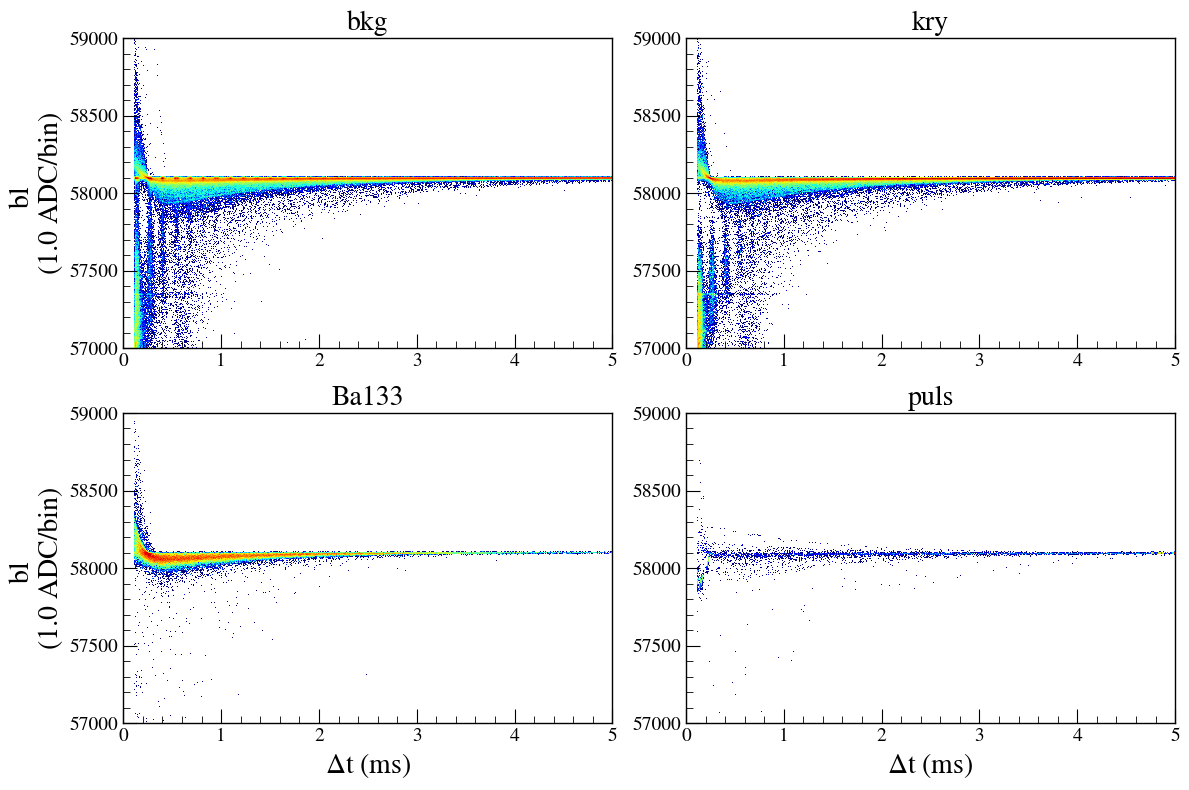

In [ ]:
# plot dt vs trapEmax_cal 2D histogram for each sample in a 2x2 grid
fig, ax = plt.subplots(2,2, figsize=(12,8))
dt_range = (0,5)
bl_range = (57000,59000)

dt_nbins = 500
bl_nbins = 2000

for i, sample in enumerate(sample_runs):
    ax[i//2,i%2].hist2d(dsp[sample]['dt'], dsp[sample]['bl'], bins=(dt_nbins,bl_nbins), 
    cmap='jet', norm=matplotlib.colors.LogNorm(),range=(dt_range,bl_range))
    ax[i//2,i%2].set_title(sample)
    
    if (i==0) or (i==2):
        ax[i//2,i%2].set_ylabel('bl \n('+str((bl_range[1]-bl_range[0])/bl_nbins)+' ADC/bin)')
    if (i==2) or (i==3):
        ax[i//2,i%2].set_xlabel(r'$\Delta$t (ms)')


plt.tight_layout()



Text(0.5, 1.0, 'Ba133')

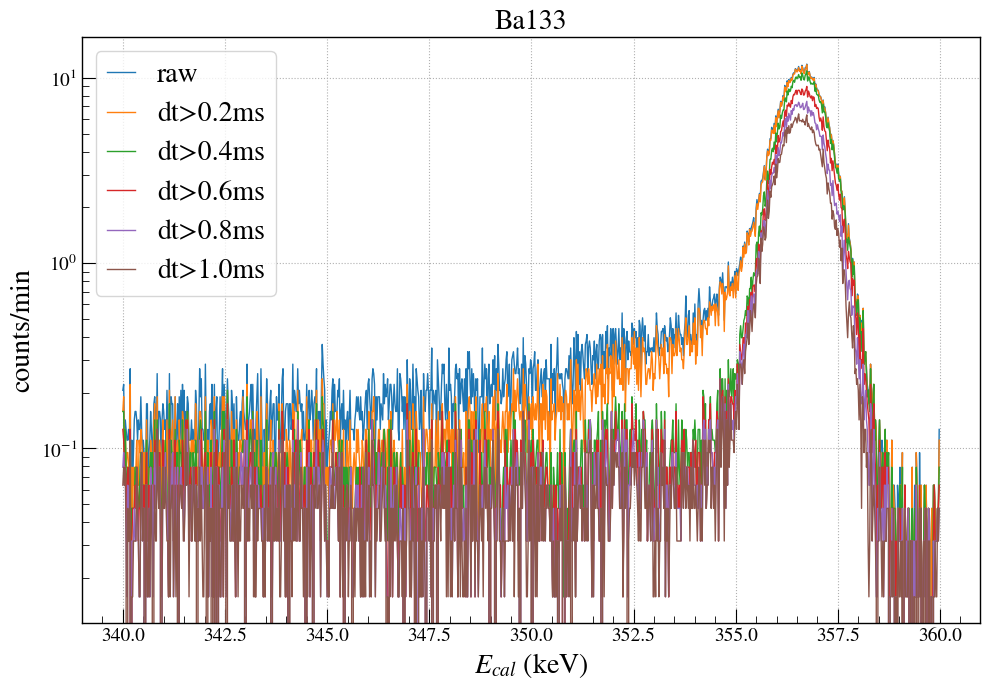

In [ ]:
# plot trapEmax_cal histogram for Ba133 without cuts between 340kev and 360kev
n_bins = 1000
h,b,v = pgh.get_hist(dsp['Ba133']['trapEmax_cal'], bins=n_bins, range=(340,360))
h = h/(sample_runs['Ba133']['runtime'])
plt.plot(b[:-1], h, linewidth=1, label='raw')

dt_cuts = [0.2, 0.4, 0.6, 0.8, 1.0]

for i, dt_cut in enumerate(dt_cuts):
    h,b,v = pgh.get_hist(dsp['Ba133'][dsp['Ba133']['dt']>dt_cut]['trapEmax_cal'], bins=n_bins, range=(340,360))
    h = h/(sample_runs['Ba133']['runtime'])
    plt.plot(b[:-1], h, linewidth=1, label='dt>'+str(dt_cut)+'ms')


plt.yscale('log')
plt.legend()

plt.xlabel(r'$E_{cal}$ (keV)')
plt.ylabel('counts/min')
plt.title('Ba133')



In [ ]:
# calculate total events in each sample
for sample in sample_runs:
    sample_runs[sample]['uncut_total_events']=len(dsp[sample])
sample_runs    


{'bkg': {'cycle_range': [2225, 2279],
  'runtime': 5285.994885427834,
  'uncut_total_events': 5641767},
 'kry': {'cycle_range': [2280, 2331],
  'runtime': 6930.303436666167,
  'uncut_total_events': 4847794},
 'Ba133': {'cycle_range': [2332, 2334],
  'runtime': 63.1229433365,
  'uncut_total_events': 368512},
 'puls': {'cycle_range': [2335, 2347],
  'runtime': 17.173037132500003,
  'uncut_total_events': 68224}}

In [ ]:
# keep only events with dt > dt_cut_val ms

dt_cut_val = 0.8 #ms
dsp_dt_cut = dsp.copy()

for sample in sample_runs:
    dsp_dt_cut[sample] = dsp_dt_cut[sample][dsp[sample]['dt']>dt_cut_val]

    # calculate percentage of events that were kept
    sample_runs[sample]['dt>'+str(dt_cut_val)+'ms%']=len(dsp_dt_cut[sample])/sample_runs[sample]['uncut_total_events']*100
pd.DataFrame(sample_runs)


,bkg,kry,Ba133,puls
cycle_range,"[2225, 2279]","[2280, 2331]","[2332, 2334]","[2335, 2347]"
runtime,5285.994885,6930.303437,63.122943,17.173037
uncut_total_events,5641767,4847794,368512,68224
dt>0.8ms%,86.169829,87.155601,52.270482,79.162758


Text(0.5, 1.0, 'Detector baseline for $\\Delta$t>0.8 ms')

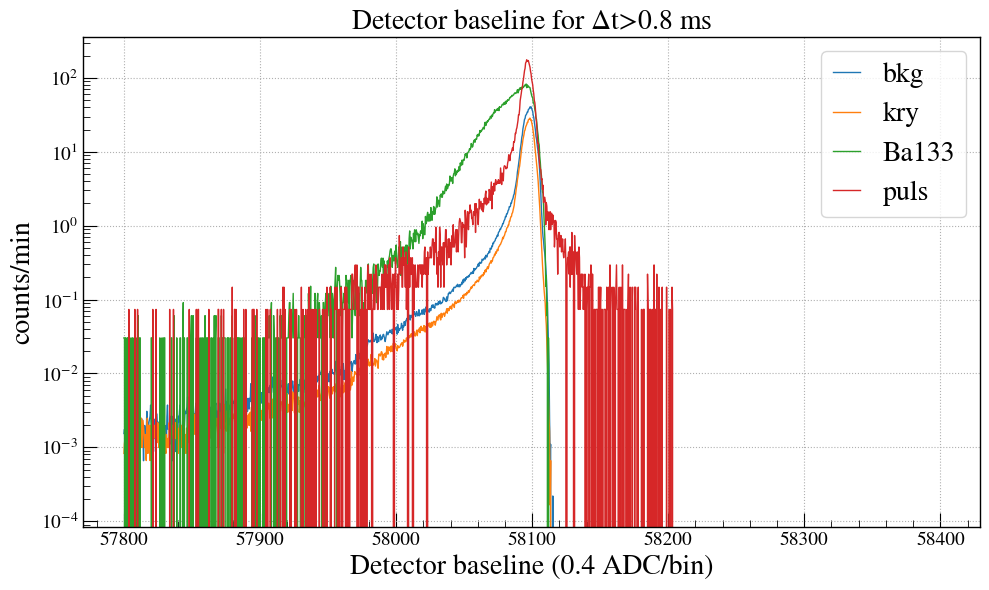

In [ ]:
# new bl histogram for each sample
fig, ax = plt.subplots(1,1, figsize=(10,6))
range = (57800,58400)
bin_size = 0.4 #ADC
for sample in sample_runs:
    h,b,v = pgh.get_hist(dsp_dt_cut[sample]['bl'], bins=np.arange(*range,bin_size), range=range)
    h = h/(sample_runs[sample]['runtime']*sample_runs[sample]['dt>'+str(dt_cut_val)+'ms%']/100)
    ax.plot(b[:-1], h, label=sample, linewidth=1)
#plt.xlim(57800,58400)
plt.legend()

plt.xlabel('Detector baseline ('+ str(bin_size)+' ADC/bin)')
plt.ylabel('counts/min')
plt.yscale('log')
plt.title(r'Detector baseline for $\Delta$t>'+str(dt_cut_val)+' ms')

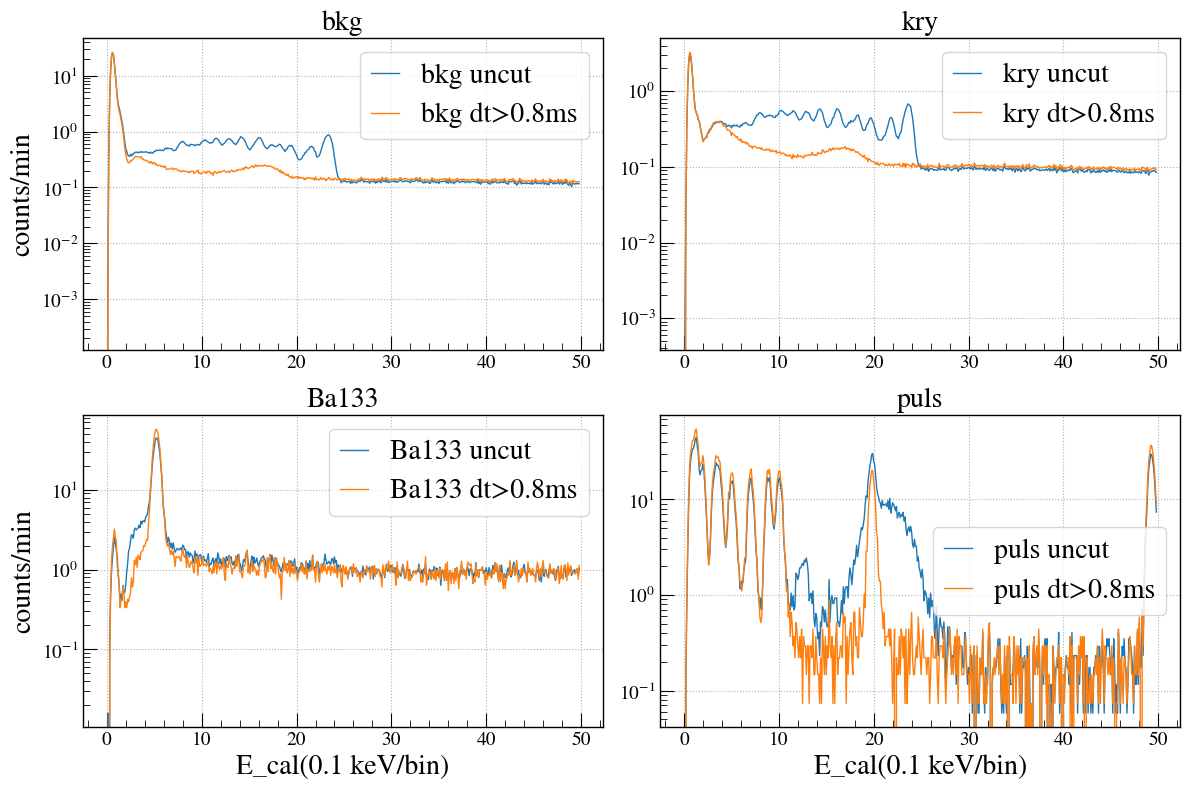

In [ ]:
# 2x2 grid plot with histogram of trapEmax_cal comparing dsp with dsp_dt_cut for each sample in sample_runs

fig, ax = plt.subplots(2,2, figsize=(12,8))
range = (0,50)
bin_size = 0.1 #keV
for i, sample in enumerate(sample_runs):
    h,b,v = pgh.get_hist(dsp[sample]['trapEmax_cal'], bins=np.arange(*range,bin_size), range=range)
    h = h/(sample_runs[sample]['runtime'])
    ax[i//2,i%2].plot(b[:-1], h, label=sample+' uncut', linewidth=1)
    
    h,b,v = pgh.get_hist(dsp_dt_cut[sample]['trapEmax_cal'], bins=np.arange(*range,bin_size), range=range)
    h = h/(sample_runs[sample]['runtime']*sample_runs[sample]['dt>'+str(dt_cut_val)+'ms%']/100)
    ax[i//2,i%2].plot(b[:-1], h, label=sample+' dt>'+str(dt_cut_val)+'ms', linewidth=1)
    
    ax[i//2,i%2].set_title(sample)
    #ax[i//2,i%2].set_xlabel('trapEmax_cal (keV)')
    #ax[i//2,i%2].set_ylabel('counts/min')

    if (i==0) or (i==2):
        ax[i//2,i%2].set_ylabel('counts/min')
    if (i==2) or (i==3):
        ax[i//2,i%2].set_xlabel('E_cal('+str(bin_size)+' keV/bin)')


    ax[i//2,i%2].legend()
    
    # make all the plot y axis log scale
    ax[i//2,i%2].set_yscale('log')

    



In [ ]:
dsp['Ba133'].shape

(368512, 9)

Text(0.5, 1.0, 'KrSTC bkg vs kry at low E')

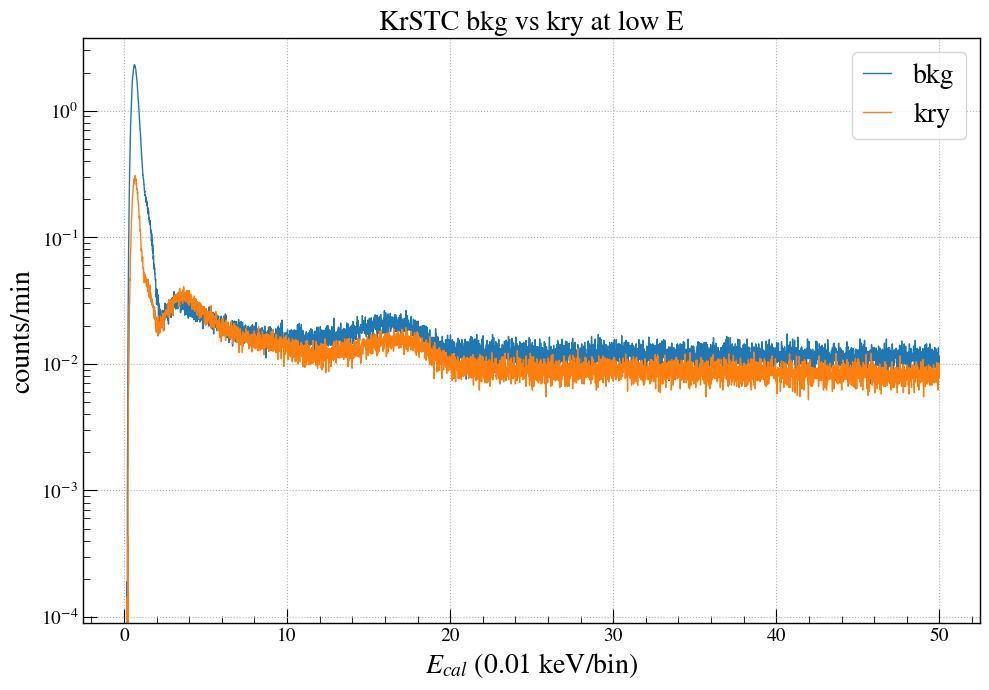

In [ ]:
# plot trapEmax_cal histogram for bkg vs kry with dt cut and up to 30 kev
n_bins = 5000
range = (0,50) #keV
h,b,v = pgh.get_hist(dsp_dt_cut['bkg']['trapEmax_cal'], bins=n_bins, range=range)
h = h/(sample_runs['bkg']['runtime'])
plt.plot(b[:-1], h, linewidth=1, label='bkg')

h,b,v = pgh.get_hist(dsp_dt_cut['kry']['trapEmax_cal'], bins=n_bins, range=range)
h = h/(sample_runs['kry']['runtime'])
plt.plot(b[:-1], h, linewidth=1, label='kry')

plt.yscale('log')
plt.legend()
plt.xlabel(r'$E_{cal}$ ('+str((range[1]-range[0])/n_bins)+' keV/bin)')
plt.ylabel('counts/min')
plt.title('KrSTC bkg vs kry at low E')


# Rejecting multi-site events

Relevant for characterizing $\alpha$ events. But KrSTC only cared about $\beta$ events. ToE is more relevant in that case.

## AoE analysis

### 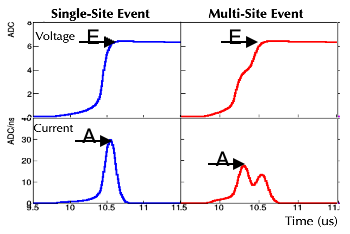

Text(0.5, 1.0, '$\\frac{A}{E}$ distribution (uncut)')

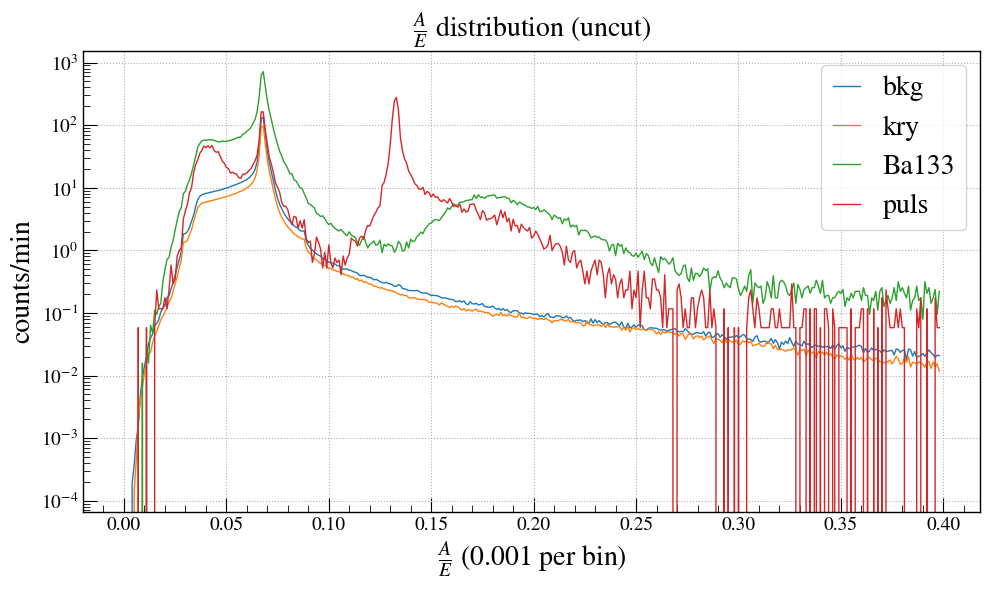

In [ ]:
# plot AoE histogram for each sample in dsp
fig, ax = plt.subplots(1,1, figsize=(10,6))
range = (0,0.4)
bin_size = 0.001

for run in sample_runs:
    h,b,v = pgh.get_hist(dsp[run]['AoE'], bins=np.arange(*range,bin_size), range=range)
    h = h/(sample_runs[run]['runtime'])
    ax.plot(b[:-1], h, label=run, linewidth=1)
plt.legend()
plt.xlabel(r'$\frac{A}{E}$ ('+str(bin_size)+' per bin)')
plt.ylabel('counts/min')
plt.yscale('log')
plt.title(r'$\frac{A}{E}$ distribution (uncut)')


/tmp/ipykernel_34733/613370701.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax[i//2,i%2].hist2d(dsp[run]['trapEmax_cal'], dsp[run]['AoE'], bins=(np.arange(*range[0],bin_size[0]),np.arange(*range[1],bin_size[1])),


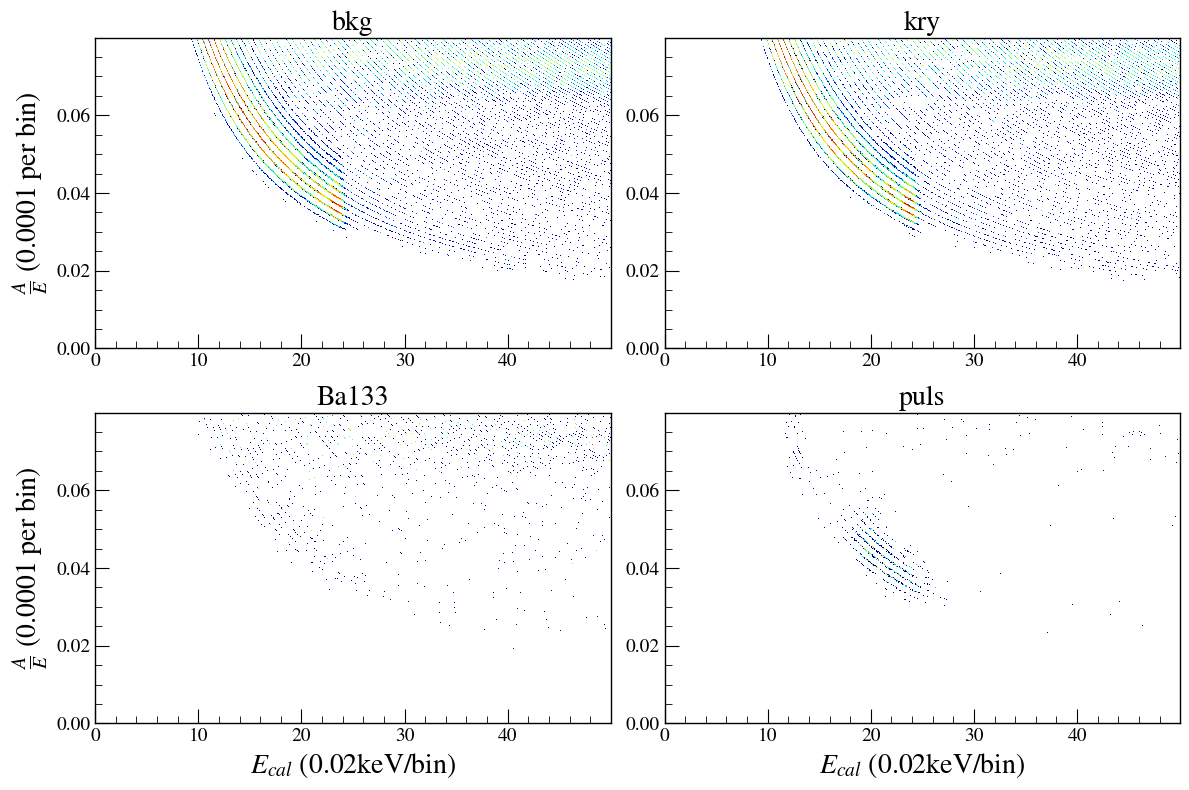

In [ ]:
# plot AoE vs trapEmax_cal between 1550 kev to 1650 kev 2D histogram for each sample in a 2x2 grid
fig, ax = plt.subplots(2,2, figsize=(12,8))
range = ((0,50),(0,0.08))
bin_size = (0.02,0.0001) # keV, None(?)

for i, run in enumerate(sample_runs):
    ax[i//2,i%2].hist2d(dsp[run]['trapEmax_cal'], dsp[run]['AoE'], bins=(np.arange(*range[0],bin_size[0]),np.arange(*range[1],bin_size[1])), 
                        cmap='jet', norm=matplotlib.colors.LogNorm(),range=range)
    ax[i//2,i%2].set_title(run)
    
    if (i==0) or (i==2):
        ax[i//2,i%2].set_ylabel(r'$\frac{A}{E}$ ('+str(bin_size[1])+' per bin)')
    if (i==2) or (i==3):
        ax[i//2,i%2].set_xlabel(r'$E_{cal}$ ('+ str(bin_size[0]) +'keV/bin)')
    

    # make all the plot y axis log scale
    #ax[i//2,i%2].set_yscale('log')
plt.tight_layout()
#plt.title('AoE vs E_cal (uncut)')



In [ ]:
# plot histograms of AoE for events within trapEmax_cal=[1592,1593] for each run in sample_runs in a 2x2 grid
# fig, ax = plt.subplots(2,2, figsize=(12,8))
# range = (0.04,0.08)
# bin_size = 0.0001
# ecal_range = (1580,1610)
# for i, run in enumerate(sample_runs):
    

#     h,b,v = pgh.get_hist(dsp[run][(dsp[run]['trapEmax_cal']>ecal_range[0]) & (dsp[run]['trapEmax_cal']<ecal_range[1])]['AoE'], 
#                          bins=np.arange(*range,bin_size), range=range)
#     h = h/(sample_runs[run]['runtime'])
#     ax[i//2,i%2].plot(b[:-1], h, label=run, linewidth=1)

#     ax[i//2,i%2].set_title(run)
    
#     if (i==0) or (i==2):
#         ax[i//2,i%2].set_ylabel('counts/min')
#     if (i==2) or (i==3):
#         ax[i//2,i%2].set_xlabel(r'$\frac{A}{E}$ ('+str(bin_size[1])+' per bin)')

    

    


Text(0.5, 1.0, '$\\frac{A}{E}$ distribution for $1580<E_{cal}<1610$ keV (uncut)')

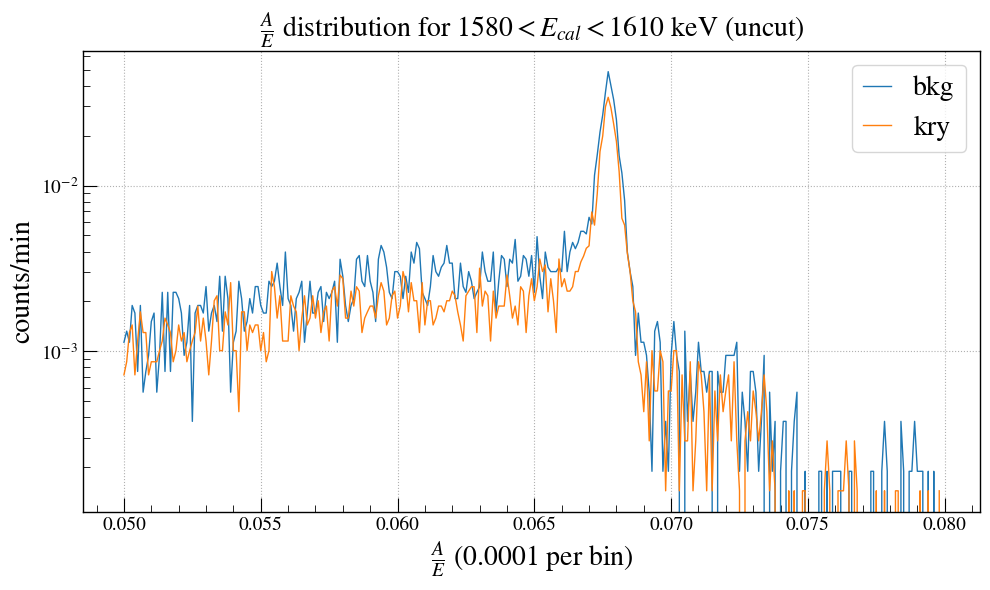

In [ ]:
# plot histograms of AoE for events within trapEmax_cal=[1592,1593] for each run in sample_runs
fig, ax = plt.subplots(1,1, figsize=(10,6))
range = (0.05,0.08)
bin_size = 0.0001

ecal_range = (1580,1610)

for run in sample_runs:
    if ((run=='bkg') or (run=='kry')):
        h,b,v = pgh.get_hist(dsp[run][(dsp[run]['trapEmax_cal']>ecal_range[0]) & (dsp[run]['trapEmax_cal']<ecal_range[1])]['AoE'], 
                         bins=np.arange(*range,bin_size), range=range)
        h = h/(sample_runs[run]['runtime'])
        ax.plot(b[:-1], h, label=run, linewidth=1)
    

    

plt.legend()
plt.xlabel(r'$\frac{A}{E}$ ('+str(bin_size)+' per bin)')
plt.ylabel('counts/min')
plt.yscale('log')
plt.title(r'$\frac{A}{E}$ distribution for $'+str(ecal_range[0])+'<E_{cal}<'+str(ecal_range[1])+'$ keV (uncut)')

Text(0.5, 1.0, '$\\frac{A}{E}$ distribution for $1580<E_{cal}<1610$ keV (with $\\Delta t$>0.8ms)')

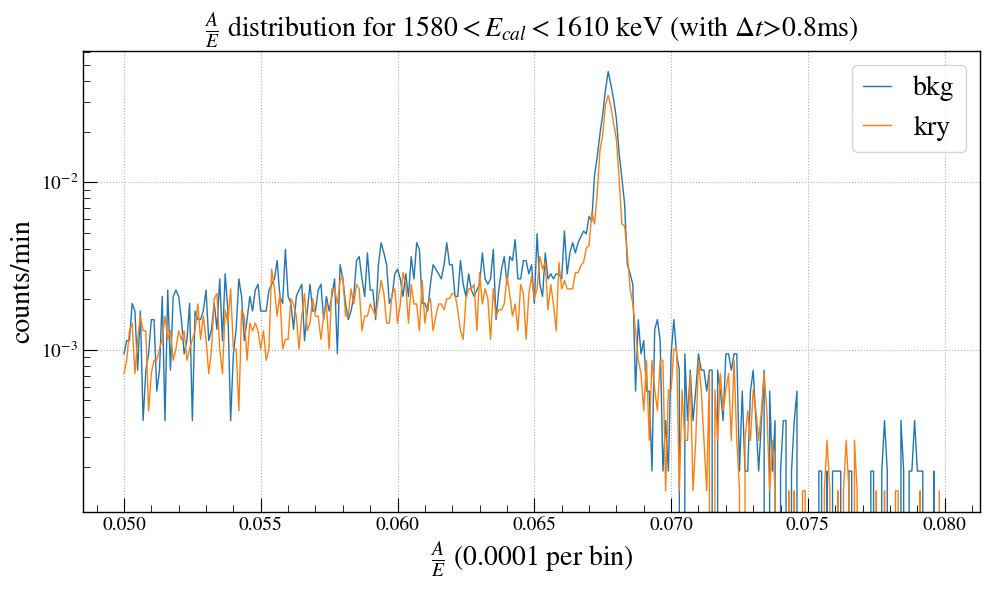

In [ ]:
# plot histograms of AoE for events within trapEmax_cal=[1592,1593] for each run in sample_runs
fig, ax = plt.subplots(1,1, figsize=(10,6))
range = (0.05,0.08)
bin_size = 0.0001

ecal_range = (1580,1610)

#dt_cut_val = 0.8 #ms

for run in sample_runs:
    if ((run=='bkg') or (run=='kry')):
        h,b,v = pgh.get_hist(dsp[run][(dsp[run]['trapEmax_cal']>ecal_range[0]) & (dsp[run]['trapEmax_cal']<ecal_range[1]) & (dsp[run]['dt']>dt_cut_val)]['AoE'], 
                         bins=np.arange(*range,bin_size), range=range)
        h = h/(sample_runs[run]['runtime'])
        ax.plot(b[:-1], h, label=run, linewidth=1)
    

    

plt.legend()
plt.xlabel(r'$\frac{A}{E}$ ('+str(bin_size)+' per bin)')
plt.ylabel('counts/min')
plt.yscale('log')
plt.title(r'$\frac{A}{E}$ distribution for $'+str(ecal_range[0])+'<E_{cal}<'+str(ecal_range[1])+r'$ keV (with $\Delta t$>'+str(dt_cut_val)+'ms)')

In [ ]:
# plot aoe vs ecal 

# ToE analysis
$ToE = \frac{T}{E} = \frac{wf_{max,triangle-filter}}{wf_{max,trapezoidal filter}}$

wf_max by triangle filter is higher if the rising edge has higher slope. 

/tmp/ipykernel_34733/1777742455.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax[i//2,i%2].hist2d(dsp[run][dsp[run]['dt']<0.8]['trapEmax_cal'], dsp[run][dsp[run]['dt']<0.8]['ToE'], bins=(np.arange(*range[0],bin_size[0]),np.arange(*range[1],bin_size[1])),


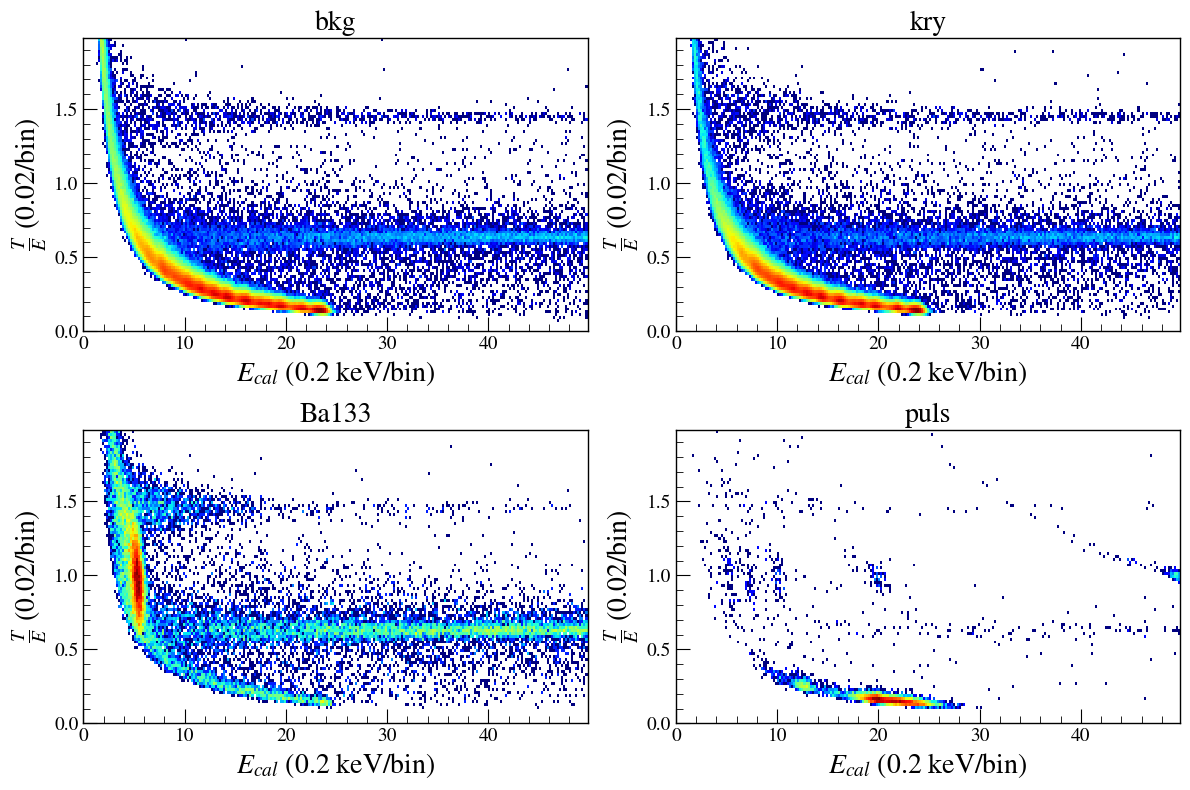

In [ ]:
# plot 2d histograms of ToE vs trapEmax_cal for each run in sample_runs in a 2x2 grid
fig, ax = plt.subplots(2,2, figsize=(12,8))
range = ((0,50),(0,2))
bin_size = (0.2,0.02) # keV, None(?)
for i, run in enumerate(sample_runs):
    
    ax[i//2,i%2].hist2d(dsp[run][dsp[run]['dt']<0.8]['trapEmax_cal'], dsp[run][dsp[run]['dt']<0.8]['ToE'], bins=(np.arange(*range[0],bin_size[0]),np.arange(*range[1],bin_size[1])), 
                        cmap='jet', norm=matplotlib.colors.LogNorm(),range=range)
    ax[i//2,i%2].set_title(run)
    
    #if (i==0) or (i==2):
    ax[i//2,i%2].set_ylabel(r'$\frac{T}{E}$ ('+str(bin_size[1])+'/bin)')
    #if (i==2) or (i==3):
    ax[i//2,i%2].set_xlabel(r'$E_{cal}$ ('+ str(bin_size[0]) +' keV/bin)')
    

    # make all the plot y axis log scale
    #ax[i//2,i%2].set_yscale('log') 

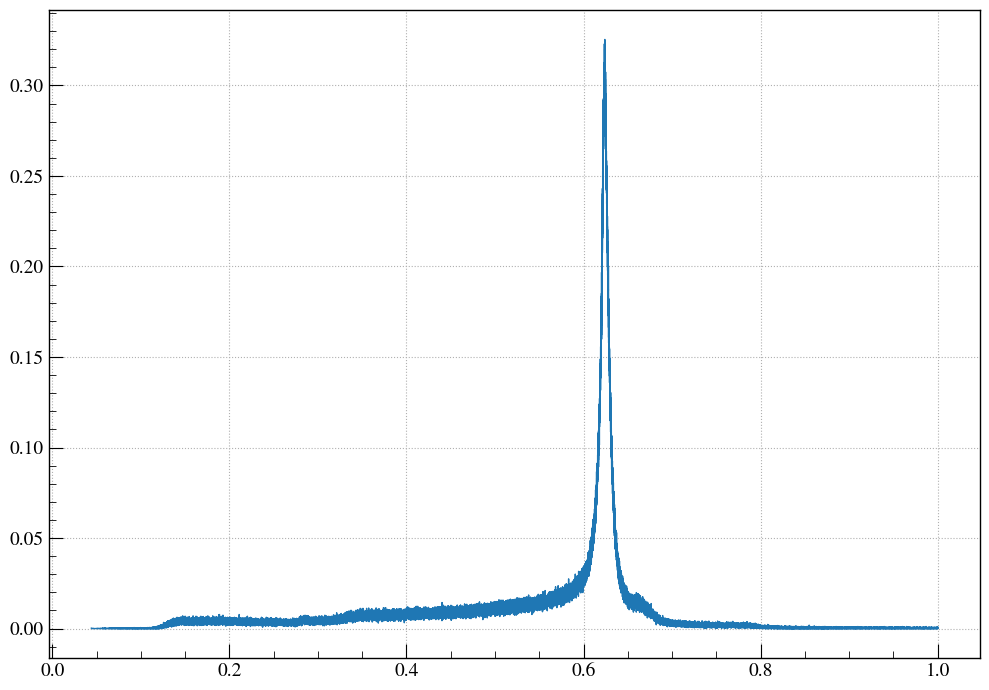

In [ ]:
# plot histogram ToE for bkg
run = 'bkg'
h,b,v = pgh.get_hist(dsp[run]['ToE'][dsp[run]['ToE']<1], bins=100000)
h = h/sample_runs[run]['runtime']
plt.plot(b[:-1], h, label=run, linewidth=1)
    

### energy spectrums with both dt cut and AoE cut

In [ ]:
sample_runs

{'bkg': {'cycle_range': [2225, 2279],
  'runtime': 5285.994885427834,
  'uncut_total_events': 5641767,
  'dt>0.8ms%': 86.1698294169185},
 'kry': {'cycle_range': [2280, 2331],
  'runtime': 6930.303436666167,
  'uncut_total_events': 4847794,
  'dt>0.8ms%': 87.15560108370941},
 'Ba133': {'cycle_range': [2332, 2334],
  'runtime': 63.1229433365,
  'uncut_total_events': 368512,
  'dt>0.8ms%': 52.27048237235151},
 'puls': {'cycle_range': [2335, 2347],
  'runtime': 17.173037132500003,
  'uncut_total_events': 68224,
  'dt>0.8ms%': 79.16275797373359}}

In [ ]:
dt_cut_val = 0.8 #ms
aoe_cut_val = [0.067,0.0685]

#calculate percentage of uncut_total_events for each run that are within aoe_cut_val and more than dt_cut_val

for run in sample_runs:
    sample_runs[run]['dt_cut_and_aoe_cut'] = len(dsp[run][(dsp[run]['dt']>dt_cut_val) & (dsp[run]['AoE']>aoe_cut_val[0]) & (dsp[run]['AoE']<aoe_cut_val[1])])/sample_runs[run]['uncut_total_events']*100
pd.DataFrame(sample_runs)

,bkg,kry,Ba133,puls
cycle_range,"[2225, 2279]","[2280, 2331]","[2332, 2334]","[2335, 2347]"
runtime,5285.994885,6930.303437,63.122943,17.173037
uncut_total_events,5641767,4847794,368512,68224
dt>0.8ms%,86.169829,87.155601,52.270482,79.162758
dt_cut_and_aoe_cut,18.13368,20.197723,10.074027,5.484873


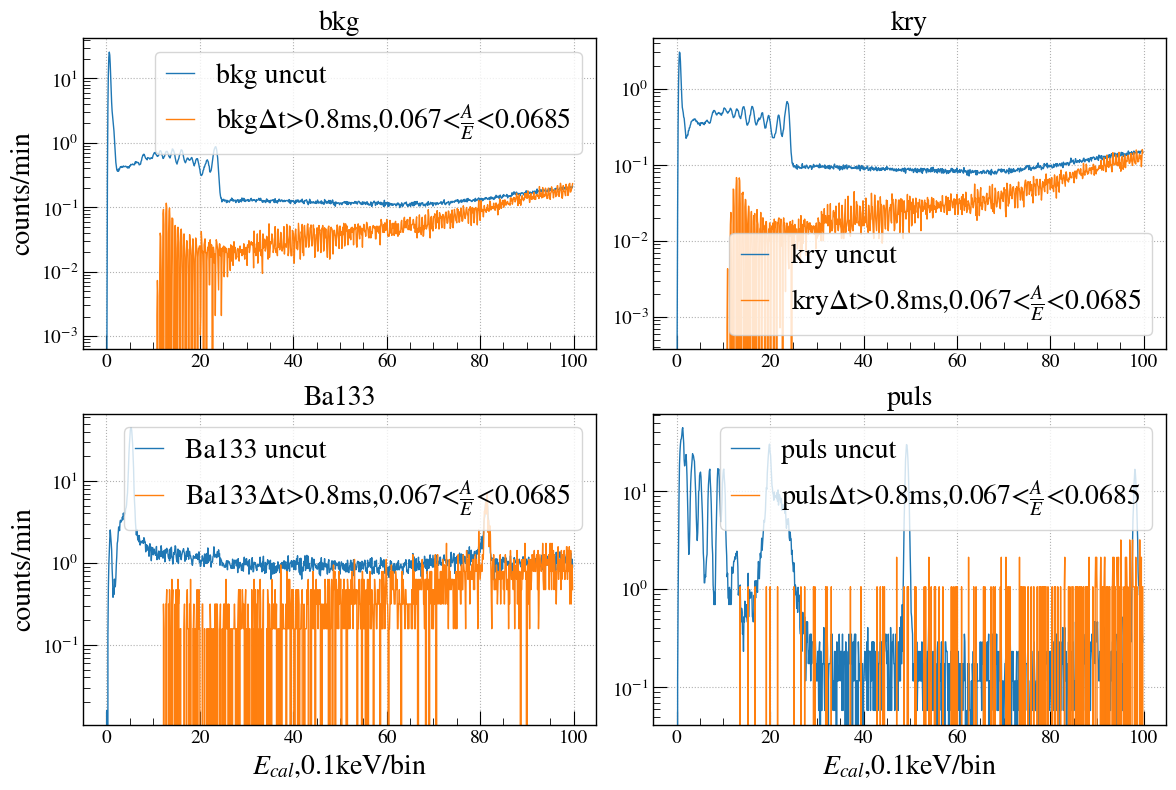

In [ ]:
# plot histograms of trapEmax_cal for uncut vs both dt_cut_val and aoe_cut_val for each run in sample_runs in a 2x2 grid

fig, ax = plt.subplots(2,2, figsize=(12,8))
e_cal_range = (0,100)
bin_size = 0.1 #keV

for i, run in enumerate(sample_runs):
    
        h,b,v = pgh.get_hist(dsp[run]['trapEmax_cal'], 
                            bins=np.arange(*e_cal_range,bin_size), range=e_cal_range)
        h = h/(sample_runs[run]['runtime'])
        ax[i//2,i%2].plot(b[:-1], h, label=run+' uncut', linewidth=1)
    
        h,b,v = pgh.get_hist(dsp[run][(dsp[run]['dt']>dt_cut_val) & (dsp[run]['AoE']>aoe_cut_val[0]) & (dsp[run]['AoE']<aoe_cut_val[1])]['trapEmax_cal'], bins=np.arange(*e_cal_range,bin_size), range=e_cal_range)
        h = h/(sample_runs[run]['runtime']*sample_runs[run]['dt_cut_and_aoe_cut']/100)
        ax[i//2,i%2].plot(b[:-1], h, label=run+r'$\Delta$t>'+str(dt_cut_val)+'ms,'+str(aoe_cut_val[0])+r'<$\frac{A}{E}$<'+str(aoe_cut_val[1]), linewidth=1)
    
        ax[i//2,i%2].set_title(run)
        
        if (i==0) or (i==2):
            ax[i//2,i%2].set_ylabel('counts/min')
        if (i==2) or (i==3):
            ax[i//2,i%2].set_xlabel(r'$E_{cal}$,'+str(bin_size)+ 'keV/bin')
        ax[i//2,i%2].legend()
        ax[i//2,i%2].set_yscale('log')

# $\Delta (\frac{T}{E})$ analysis

In [ ]:
# create a new column in dsp with differences of ToE between consecutive events for each run
for run in sample_runs:
    dsp[run]['ToE_diff'] = dsp[run]['ToE'].diff()
dsp['bkg']

,trapEmax,bl,AoE,dcr,ToE,triEmax,timestamp,trapEmax_cal,dt,ToE_diff
0,254.190109,58100.636719,0.069321,0.543452,0.629963,160.130341,3315024,109.687943,NaN,NaN
1,775.259216,58099.328125,0.068577,0.419149,0.621490,481.816162,3713733,334.268707,3.98709,-0.008473
2,507.551636,58100.097656,0.064704,0.524397,0.595111,302.049683,4490709,218.886749,7.76976,-0.026379
3,557.235779,58093.195312,0.081543,0.605301,0.749283,417.527435,4715770,240.300629,2.25061,0.154172
4,533.966919,58099.695312,0.070674,0.578300,0.635385,339.274628,6958394,230.271744,22.42624,-0.113898
...,...,...,...,...,...,...,...,...,...,...
5641762,2595.072998,58096.230469,0.058104,0.493177,0.546168,1417.346436,77091058939,1118.608398,28.57137,-0.082723
5641763,1.628434,58103.753906,1.350821,-0.383568,4.545971,7.402814,77091813197,0.833855,7.54258,3.999803
5641764,533.597839,58103.898438,0.067369,0.377049,0.626648,334.377808,77093439530,230.112671,16.26333,-3.919323
5641765,372.359680,58100.406250,0.062658,0.397533,0.573225,213.445770,77093917044,160.619019,4.77514,-0.053423


/tmp/ipykernel_34733/728615438.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax[i//2,i%2].hist2d(dsp[run][dsp[run]['dt']<0.8]['trapEmax_cal'], dsp[run][dsp[run]['dt']<0.8]['ToE_diff'], bins=(np.arange(*range[0],bin_size[0]),np.arange(*range[1],bin_size[1])),


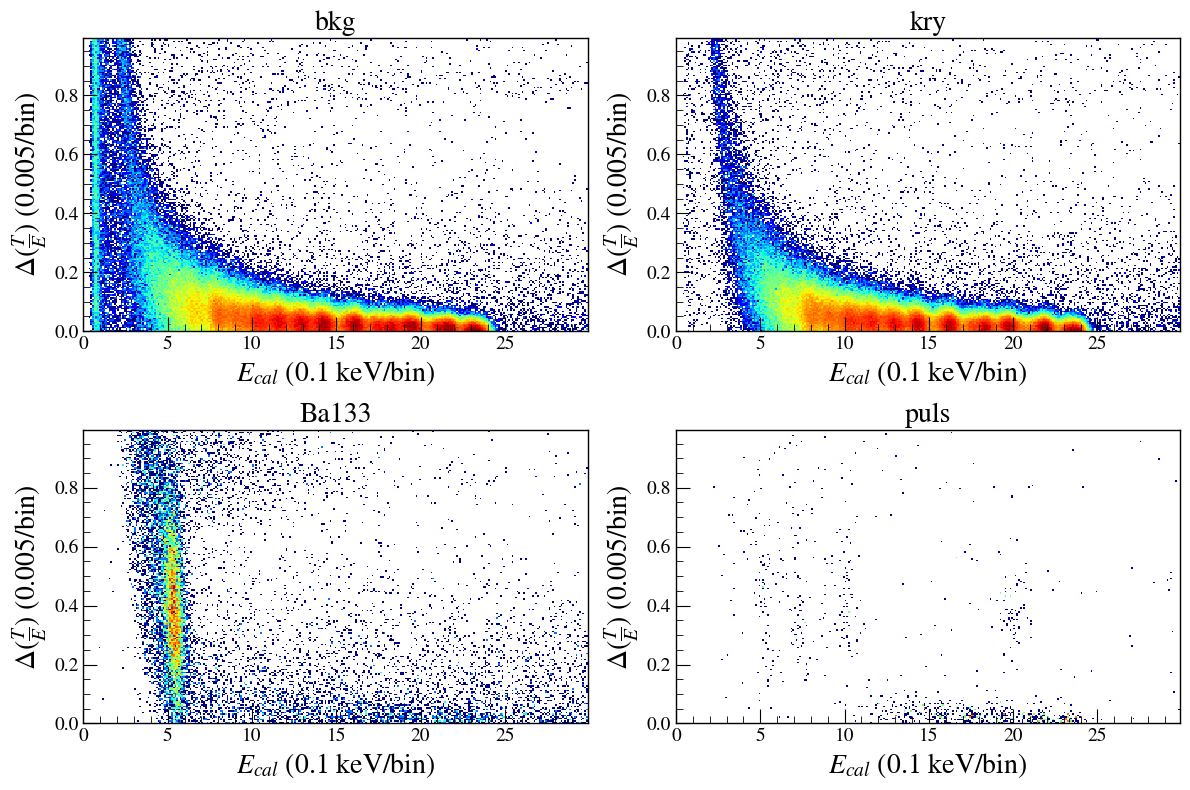

In [ ]:
# plot ToE_diff vs E_cal 2d histogram for each run in sample_runs in a 2x2 grid 

fig, ax = plt.subplots(2,2, figsize=(12,8))
range = ((0,30),(0,1))
bin_size = (0.1,0.005) # keV, None(?)
for i, run in enumerate(sample_runs):
        
        ax[i//2,i%2].hist2d(dsp[run][dsp[run]['dt']<0.8]['trapEmax_cal'], dsp[run][dsp[run]['dt']<0.8]['ToE_diff'], bins=(np.arange(*range[0],bin_size[0]),np.arange(*range[1],bin_size[1])), 
                            cmap='jet', norm=matplotlib.colors.LogNorm(),range=range)
        ax[i//2,i%2].set_title(run)
        
        #if (i==0) or (i==2):
        ax[i//2,i%2].set_ylabel(r'$\Delta(\frac{T}{E})$ ('+str(bin_size[1])+'/bin)')
        #if (i==2) or (i==3):
        ax[i//2,i%2].set_xlabel(r'$E_{cal}$ ('+ str(bin_size[0]) +' keV/bin)')
        
    
        # make all the plot y axis log scale
        #ax[i//2,i%2].set_yscale('log')

In [ ]:
# plot waveforms based on cut values



# $\frac{\Delta T}{E}$ analysis

In [ ]:
# create a new column in dsp with differences of ToE between consecutive events for each run
for run in sample_runs:
    dsp[run]['triEmax_diff'] = dsp[run]['triEmax'].diff()
dsp['bkg']

,trapEmax,bl,AoE,dcr,ToE,triEmax,timestamp,trapEmax_cal,dt,ToE_diff,triEmax_diff
0,254.190109,58100.636719,0.069321,0.543452,0.629963,160.130341,3315024,109.687943,NaN,NaN,NaN
1,775.259216,58099.328125,0.068577,0.419149,0.621490,481.816162,3713733,334.268707,3.98709,-0.008473,321.685822
2,507.551636,58100.097656,0.064704,0.524397,0.595111,302.049683,4490709,218.886749,7.76976,-0.026379,-179.766479
3,557.235779,58093.195312,0.081543,0.605301,0.749283,417.527435,4715770,240.300629,2.25061,0.154172,115.477753
4,533.966919,58099.695312,0.070674,0.578300,0.635385,339.274628,6958394,230.271744,22.42624,-0.113898,-78.252808
...,...,...,...,...,...,...,...,...,...,...,...
5641762,2595.072998,58096.230469,0.058104,0.493177,0.546168,1417.346436,77091058939,1118.608398,28.57137,-0.082723,1204.037231
5641763,1.628434,58103.753906,1.350821,-0.383568,4.545971,7.402814,77091813197,0.833855,7.54258,3.999803,-1409.943604
5641764,533.597839,58103.898438,0.067369,0.377049,0.626648,334.377808,77093439530,230.112671,16.26333,-3.919323,326.975006
5641765,372.359680,58100.406250,0.062658,0.397533,0.573225,213.445770,77093917044,160.619019,4.77514,-0.053423,-120.932037


/tmp/ipykernel_34733/2584590709.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax[i//2,i%2].hist2d(dsp[run][dsp[run]['dt']<0.8]['trapEmax_cal'], dsp[run][dsp[run]['dt']<0.8]['triEmax_diff'], bins=(np.arange(*range[0],bin_size[0]),np.arange(*range[1],bin_size[1])),


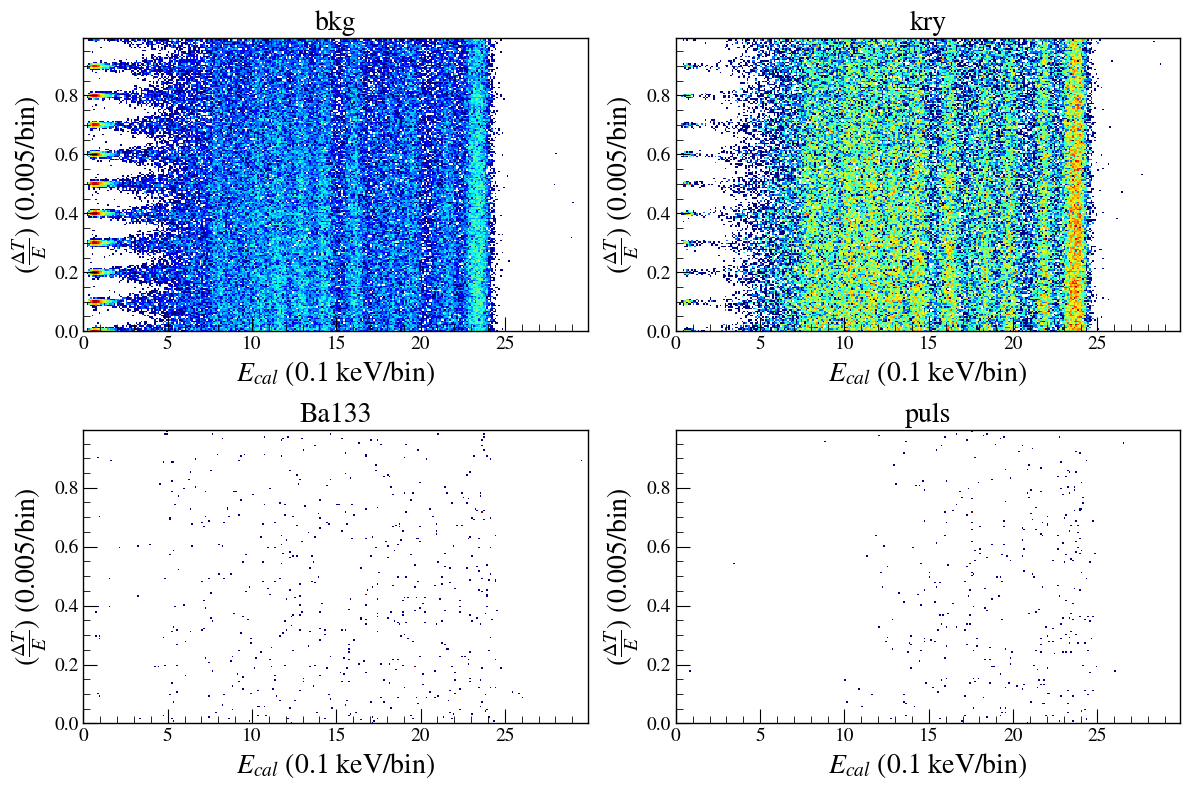

In [ ]:
# plot ToE_diff vs E_cal 2d histogram for each run in sample_runs in a 2x2 grid 

fig, ax = plt.subplots(2,2, figsize=(12,8))
range = ((0,30),(0,1))
bin_size = (0.1,0.005) # keV, None(?)
for i, run in enumerate(sample_runs):
        
        ax[i//2,i%2].hist2d(dsp[run][dsp[run]['dt']<0.8]['trapEmax_cal'], dsp[run][dsp[run]['dt']<0.8]['triEmax_diff'], bins=(np.arange(*range[0],bin_size[0]),np.arange(*range[1],bin_size[1])), 
                            cmap='jet', norm=matplotlib.colors.LogNorm(),range=range)
        ax[i//2,i%2].set_title(run)
        
        #if (i==0) or (i==2):
        ax[i//2,i%2].set_ylabel(r'$(\frac{\Delta T}{E})$ ('+str(bin_size[1])+'/bin)')
        #if (i==2) or (i==3):
        ax[i//2,i%2].set_xlabel(r'$E_{cal}$ ('+ str(bin_size[0]) +' keV/bin)')
        
    
        # make all the plot y axis log scale
        #ax[i//2,i%2].set_yscale('log')

# $\frac{T}{A}$ analysis

In [ ]:
# calculate ToA from AoE and E for each run in sample_runs

for run in sample_runs:
    dsp[run]['A'] = dsp[run]['AoE']*dsp[run]['trapEmax_cal']
    dsp[run]['ToA'] = dsp[run]['triEmax']/dsp[run]['A']
dsp['bkg']

,trapEmax,bl,AoE,dcr,ToE,triEmax,timestamp,trapEmax_cal,dt,ToE_diff,triEmax_diff,A,ToA
0,254.190109,58100.636719,0.069321,0.543452,0.629963,160.130341,3315024,109.687943,NaN,NaN,NaN,7.603706,21.059511
1,775.259216,58099.328125,0.068577,0.419149,0.621490,481.816162,3713733,334.268707,3.98709,-0.008473,321.685822,22.923170,21.018740
2,507.551636,58100.097656,0.064704,0.524397,0.595111,302.049683,4490709,218.886749,7.76976,-0.026379,-179.766479,14.162773,21.327015
3,557.235779,58093.195312,0.081543,0.605301,0.749283,417.527435,4715770,240.300629,2.25061,0.154172,115.477753,19.594845,21.308025
4,533.966919,58099.695312,0.070674,0.578300,0.635385,339.274628,6958394,230.271744,22.42624,-0.113898,-78.252808,16.274323,20.847235
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5641762,2595.072998,58096.230469,0.058104,0.493177,0.546168,1417.346436,77091058939,1118.608398,28.57137,-0.082723,1204.037231,64.995491,21.806843
5641763,1.628434,58103.753906,1.350821,-0.383568,4.545971,7.402814,77091813197,0.833855,7.54258,3.999803,-1409.943604,1.126389,6.572166
5641764,533.597839,58103.898438,0.067369,0.377049,0.626648,334.377808,77093439530,230.112671,16.26333,-3.919323,326.975006,15.502457,21.569344
5641765,372.359680,58100.406250,0.062658,0.397533,0.573225,213.445770,77093917044,160.619019,4.77514,-0.053423,-120.932037,10.064071,21.208691


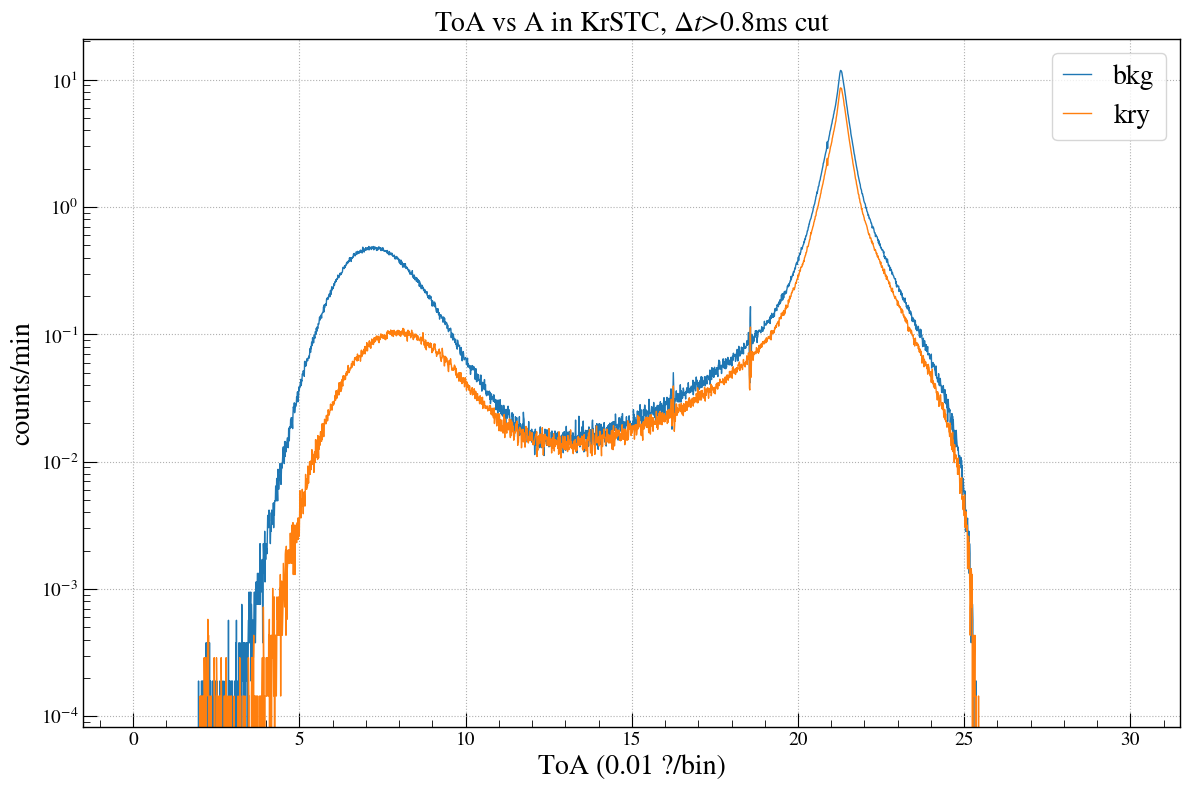

In [ ]:
# plot ToA histogram for each run in sample_runs on same plot

fig, ax = plt.subplots(1,1, figsize=(12,8))

n_bins = 3000
toa_range = (0,30)

for run in sample_runs:
    #skip for Ba133 and puls
    if (run=='Ba133') or (run=='puls'):
        continue
    
    h,b,v = pgh.get_hist(dsp[run]['ToA'][dsp[run]['dt']>dt_cut_val], bins=n_bins, range=toa_range)
    h = h/(sample_runs[run]['runtime'])
    ax.plot(b[:-1], h, label=run, linewidth=1)
    ax.set_title('ToA vs A in KrSTC, '+r'$\Delta t$>'+str(dt_cut_val)+'ms cut')
    ax.set_ylabel('counts/min')
    ax.set_xlabel('ToA ('+str((toa_range[1]-toa_range[0])/n_bins)+' ?/bin)')
    ax.set_yscale('log')
    ax.legend()

/tmp/ipykernel_34733/1402493193.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax[i//2,i%2].hist2d(dsp[run][dsp[run]['dt']>0.8]['A'], dsp[run][dsp[run]['dt']>0.8]['ToA'], bins=(np.arange(*range[0],bin_size[0]),np.arange(*range[1],bin_size[1])), cmap='jet', norm=matplotlib.colors.LogNorm(),range=range)


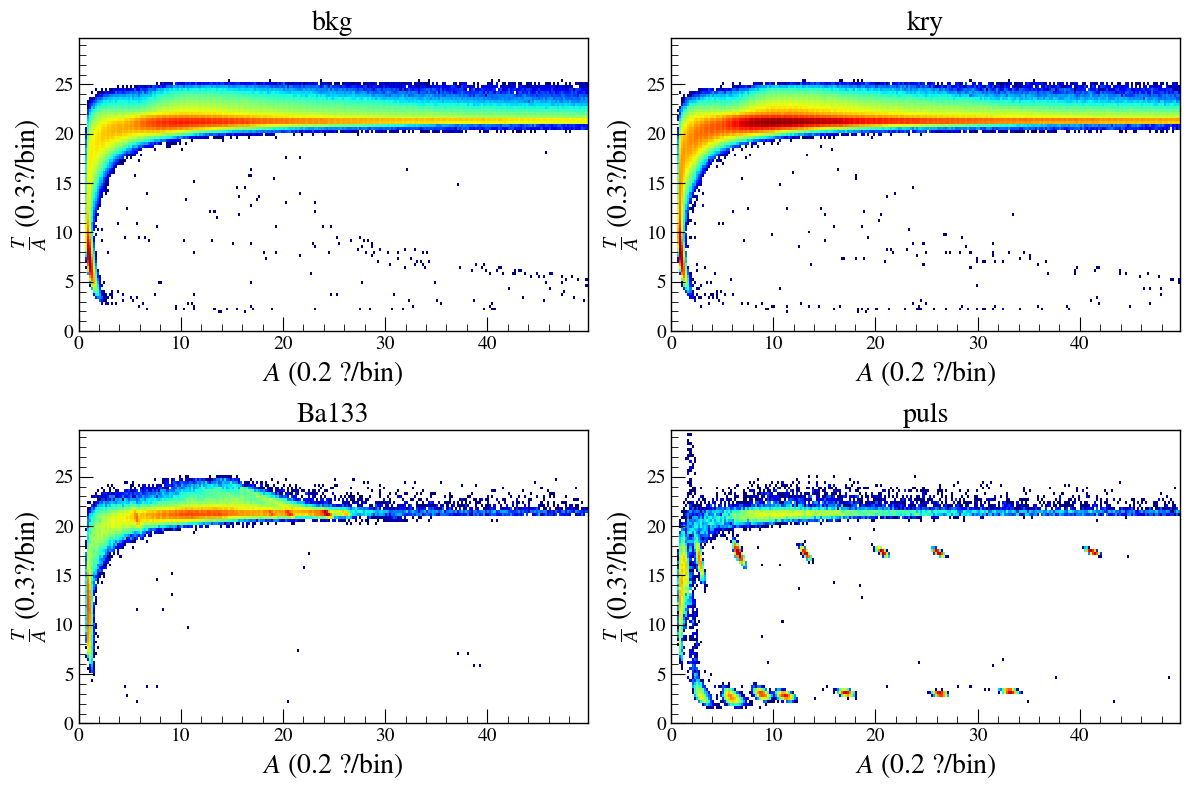

In [ ]:
# plot 2d histograms of ToA vs A for each run in sample_runs in a 2x2 grid
fig, ax = plt.subplots(2,2, figsize=(12,8))
range = ((0,50),(0,30))
bin_size = (0.2,0.3) # keV, None(?)
for i, run in enumerate(sample_runs):
    
    ax[i//2,i%2].hist2d(dsp[run][dsp[run]['dt']>0.8]['A'], dsp[run][dsp[run]['dt']>0.8]['ToA'], bins=(np.arange(*range[0],bin_size[0]),np.arange(*range[1],bin_size[1])), cmap='jet', norm=matplotlib.colors.LogNorm(),range=range)
    ax[i//2,i%2].set_title(run)
    
    #if (i==0) or (i==2):
    ax[i//2,i%2].set_ylabel(r'$\frac{T}{A}$ ('+str(bin_size[1])+'?/bin)')
    #if (i==2) or (i==3):
    ax[i//2,i%2].set_xlabel(r'$A$ ('+ str(bin_size[0]) +' ?/bin)')

#plt.title('ToA vs A in KrSTC, '+r'$\Delta t$>'+str(dt_cut_val)+'ms cut')
    

    # make all the plot y axis log scale
    #ax[i//2,i%2].set_yscale('log') 

# Waveform browser

In [ ]:
sample_runs = {
    'bkg':{'cycle_range':[2225,2279]},
    'kry':{'cycle_range':[2280,2331]},
    'Ba133':{'cycle_range':[2332,2334]},
    'puls':{'cycle_range':[2335,2347]}
}

cut_params = [{
    'name': 'trapEmax_cal', 
    'range':[30,32] #keV
},
{
    'name':'ToE',
    'range':[0.6, 0.7]
},
{
    'name':'dt',
    'range':[0.8,100]
}
]

n_wfs = 5

samples = ['bkg','kry']

calibration_consts = [0.431,0.132]
parameters = ['trapEmax', 'bl','AoE', 'dcr', 'ToE','triEmax', 'timestamp']



#--------------------------------------------------------------------#

cycles = {
    'bkg':2225,
    'kry':2285
}

while True:


    
    hit_lists_wfb = {
        'bkg':dsp_list[cycles['bkg']-2019],
        'kry':dsp_list[cycles['kry']-2019]
    }

    dsp_wfb = {
        'bkg':lh5.load_dfs(hit_lists_wfb['bkg'], parameters, 'ORSIS3302DecoderForEnergy/dsp'),
        'kry':lh5.load_dfs(hit_lists_wfb['kry'], parameters, 'ORSIS3302DecoderForEnergy/dsp')
    }




    dsp_wfb['bkg']['trapEmax_cal'] = np.polyval(calibration_consts, dsp_wfb['bkg']['trapEmax'])
    dsp_wfb['kry']['trapEmax_cal'] = np.polyval(calibration_consts, dsp_wfb['kry']['trapEmax'])

    # add new column with difference of timestamps in ms
    dsp_wfb['bkg']['dt'] = dsp_wfb['bkg']['timestamp'].diff()/1e5 #converting to ms
    dsp_wfb['kry']['dt'] = dsp_wfb['kry']['timestamp'].diff()/1e5 #converting to ms




    #dsp_wfb['bkg']


    #-----------------------------------------------------------------------------#




    selected_indices = {
        'bkg':[],
        'kry':[]
    }

    for sample in samples:

        l = dsp_wfb[sample].shape[0]
        print(sample, cycles[sample], l)
        
        indices = list(np.arange(l))
        random.shuffle(indices)
        

        for i in indices:
            
            

            #i = np.random.randint(0, l)

            # check if ith row of each dataframe is within the range of the cut parameters
            for param in cut_params:
                if dsp_wfb[sample][param['name']].iloc[i] < param['range'][0] or dsp_wfb[sample][param['name']].iloc[i] > param['range'][1]:
                    break
                #else:
                #    continue
                selected_indices[sample].append(i)

            if len(selected_indices[sample]) >= n_wfs:
                break
        

        if (cycles[sample] < sample_runs[sample]['cycle_range'][1]) or (len(selected_indices[sample]) >= n_wfs):
            cycles[sample] += 1
        else:
            break
    
    break

                


print(selected_indices)
#-----------------------------------------------------------------------------#
raw_store = lh5.LH5Store()
tb_name = 'ORSIS3302DecoderForEnergy/raw'
lh5_dir = dg.lh5_dir
raw_list = lh5_dir + dg.fileDB['raw_path'] + '/' + dg.fileDB['raw_file']
# f_raw = raw_list.values[0] # fixme, only works for one file rn
# data_raw, nrows = raw_store.read_object(tb_name, f_raw, start_row=0, n_rows=idx[-1]+1)
raw_hit_lists = {
    'bkg':raw_list[cycles['bkg']-2019],
    'kry':raw_list[cycles['kry']-2019]
}
#raw_hit_lists

raw_wfs = {
    'bkg': [],
    'kry': []
}

for sample in samples:
    f = h5py.File(raw_hit_lists[sample], 'r')
    for i in selected_indices[sample]:
        raw_wfs[sample].append(f[tb_name]['waveform']['values'][i])
#raw_wfs
#-----------------------------------------------------------------------------#
time = np.arange(raw_wfs['bkg'][0].shape[0]) #clockticks
#print(time.shape)
time = time/100 #us
#print(time.shape)

# plot time vs wfs for both bkg and kry in a 1x2 grid
fig, ax = plt.subplots(1,2, figsize=(12,4))
for i, sample in enumerate(samples):
    for j, wf in enumerate(raw_wfs[sample]):
        ax[i].plot(time, wf, label='wf'+str(j), linewidth=1)
        ax[i].set_title(sample)
        ax[i].set_xlabel(r'time ($\mu$s)')
        ax[i].set_ylabel('ADC')
        ax[i].set_xlim(37,43)
        #ax[i].legend()


#-----------------------------------------------------------------------------#

#-----------------------------------------------------------------------------#

bkg 2225 92467
kry 2285 94532
{'bkg': [45746, 67921, 30728, 5906, 75137], 'kry': [48052, 78895, 9742, 17663, 74903]}


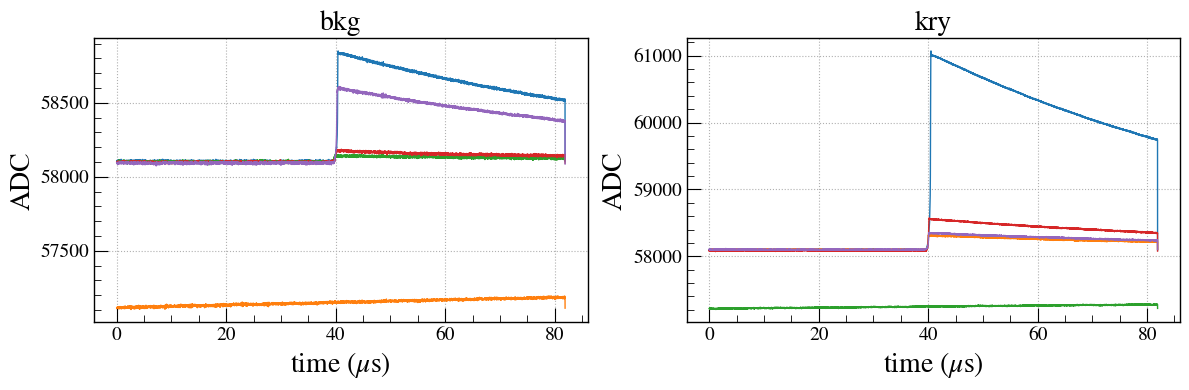

In [15]:
vals = []

sample_runs = {
    'bkg':{'cycle_range':[2225,2279]},
    'kry':{'cycle_range':[2280,2331]},
    'Ba133':{'cycle_range':[2332,2334]},
    'puls':{'cycle_range':[2335,2347]}
}

cut_params = [{
    'name': 'trapEmax_cal', 
    'range':[30,32] #keV
},
{
    'name':'ToE',
    'range':[0.6, 0.7]
},
{
    'name':'dt',
    'range':[0.8,100]
}
]

n_wfs = 5

samples = ['bkg','kry']

calibration_consts = [0.431,0.132]
parameters = ['trapEmax', 'bl','AoE', 'dcr', 'ToE','triEmax', 'timestamp']



#--------------------------------------------------------------------#

cycles = {
    'bkg':2225,
    'kry':2285
}

raw_wfs = {
    'bkg':[],
    'kry':[]
}


raw_store = lh5.LH5Store()
tb_name = 'ORSIS3302DecoderForEnergy/raw'
lh5_dir = dg.lh5_dir
raw_list = lh5_dir + dg.fileDB['raw_path'] + '/' + dg.fileDB['raw_file']

while True:


    
    hit_lists_wfb = {
        'bkg':dsp_list[cycles['bkg']-2019],
        'kry':dsp_list[cycles['kry']-2019]
    }

    dsp_wfb = {
        'bkg':lh5.load_dfs(hit_lists_wfb['bkg'], parameters, 'ORSIS3302DecoderForEnergy/dsp'),
        'kry':lh5.load_dfs(hit_lists_wfb['kry'], parameters, 'ORSIS3302DecoderForEnergy/dsp')
    }




    dsp_wfb['bkg']['trapEmax_cal'] = np.polyval(calibration_consts, dsp_wfb['bkg']['trapEmax'])
    dsp_wfb['kry']['trapEmax_cal'] = np.polyval(calibration_consts, dsp_wfb['kry']['trapEmax'])

    # add new column with difference of timestamps in ms
    dsp_wfb['bkg']['dt'] = dsp_wfb['bkg']['timestamp'].diff()/1e5 #converting to ms
    dsp_wfb['kry']['dt'] = dsp_wfb['kry']['timestamp'].diff()/1e5 #converting to ms




    #dsp_wfb['bkg']


    #-----------------------------------------------------------------------------#




    selected_indices = {
        'bkg':[],
        'kry':[]
    }

    for sample in samples:

        l = dsp_wfb[sample].shape[0]
        print(sample, cycles[sample], l)
        
        indices = list(np.arange(l))
        random.shuffle(indices)
        

        for i in indices:
            
            

            #i = np.random.randint(0, l)

            # check if ith row of each dataframe is within the range of the cut parameters
            for param in cut_params:
                if dsp_wfb[sample][param['name']].iloc[i] < param['range'][0] or dsp_wfb[sample][param['name']].iloc[i] > param['range'][1]:
                    break
                #else:
                #    continue
            selected_indices[sample].append(i)


            raw_file = raw_list[cycles[sample]-2019]
            f = h5py.File(raw_file, 'r')
            raw_wfs[sample].append(f[tb_name]['waveform']['values'][i])


            if len(selected_indices[sample]) >= n_wfs:
                break
        

        if (cycles[sample] < sample_runs[sample]['cycle_range'][1]) or (len(selected_indices[sample]) < n_wfs):
            cycles[sample] += 1
        else:
            break
    
    break

                


print(selected_indices)
#-----------------------------------------------------------------------------#


#-----------------------------------------------------------------------------#
time = np.arange(raw_wfs['bkg'][0].shape[0]) #clockticks
#print(time.shape)
time = time/100 #us
#print(time.shape)

# # plot time vs wfs for both bkg and kry in a 1x2 grid
# fig, ax = plt.subplots(1,2, figsize=(12,4))
# for i, sample in enumerate(samples):
#     for j, wf in enumerate(raw_wfs[sample]):
#         ax[i].plot(time, wf, label='wf'+str(j), linewidth=1)
#         ax[i].set_title(sample)
#         ax[i].set_xlabel(r'time ($\mu$s)')
#         ax[i].set_ylabel('ADC')
#         ax[i].set_xlim(37,43)
#         #ax[i].legend()


#-----------------------------------------------------------------------------#

#-----------------------------------------------------------------------------#
# plot raw wfs for each sample
fig, ax = plt.subplots(1,2, figsize=(12,4))
for i, sample in enumerate(samples):
    for j, wf in enumerate(raw_wfs[sample]):
        ax[i].plot(time, wf, label='wf'+str(j), linewidth=1)
        ax[i].set_title(sample)
        ax[i].set_xlabel(r'time ($\mu$s)')
        ax[i].set_ylabel('ADC')
        #ax[i].set_xlim(37,43)
        #ax[i].legend()

In [ ]:
cut_params = [{
    'name': 'trapEmax_cal', 
    'range':[30,40]
},
{
    'name':'ToE',
    'range':[0,1]
},
{
    'name':'dt',
    'range':[0.8,100]
}
]

n_wfs = 5



selected_indices = {
    'bkg':[],
    'kry':[]
}
samples = ['bkg','kry']
for sample in samples:

    l = dsp_wfb[sample].shape[0]
    print(l)

    while True:
        
        

        i = np.random.randint(0, l)

        # check if ith row of each dataframe is within the range of the cut parameters
        for param in cut_params:
            if dsp_wfb[sample][param['name']].iloc[i] < param['range'][0] or dsp_wfb[sample][param['name']].iloc[i] > param['range'][1]:
                break
        else:
            selected_indices[sample].append(i)

        if len(selected_indices[sample]) == n_wfs:
            break




selected_indices

93093
93565


{'bkg': [76525, 41536, 26198, 92349, 23157],
 'kry': [2649, 86929, 86605, 93389, 81117]}

In [ ]:
raw_store = lh5.LH5Store()
tb_name = 'ORSIS3302DecoderForEnergy/raw'
lh5_dir = dg.lh5_dir
raw_list = lh5_dir + dg.fileDB['raw_path'] + '/' + dg.fileDB['raw_file']
# f_raw = raw_list.values[0] # fixme, only works for one file rn
# data_raw, nrows = raw_store.read_object(tb_name, f_raw, start_row=0, n_rows=idx[-1]+1)
raw_hit_lists = {
    'bkg':raw_list[cycles['bkg']-2019],
    'kry':raw_list[cycles['kry']-2019]
}
raw_hit_lists

raw_wfs = {
    'bkg': [],
    'kry': []
}

for sample in samples:
    f = h5py.File(raw_hit_lists[sample], 'r')
    for i in selected_indices[sample]:
        raw_wfs[sample].append(f[tb_name]['waveform']['values'][i])
raw_wfs

{'bkg': [array([58089, 58094, 58097, ..., 58142, 58142, 58095], dtype=uint16),
  array([58102, 58106, 58105, ..., 58147, 58135, 58097], dtype=uint16),
  array([58102, 58097, 58099, ..., 58148, 58153, 58097], dtype=uint16),
  array([58094, 58095, 58095, ..., 58146, 58141, 58098], dtype=uint16),
  array([58041, 58050, 58049, ..., 58090, 58094, 58048], dtype=uint16)],
 'kry': [array([58099, 58098, 58098, ..., 58148, 58145, 58098], dtype=uint16),
  array([58105, 58103, 58101, ..., 58142, 58145, 58105], dtype=uint16),
  array([58103, 58094, 58105, ..., 58146, 58148, 58100], dtype=uint16),
  array([58107, 58103, 58105, ..., 58153, 58152, 58106], dtype=uint16),
  array([58108, 58110, 58096, ..., 58151, 58148, 58111], dtype=uint16)]}

(8192,)
(8192,)


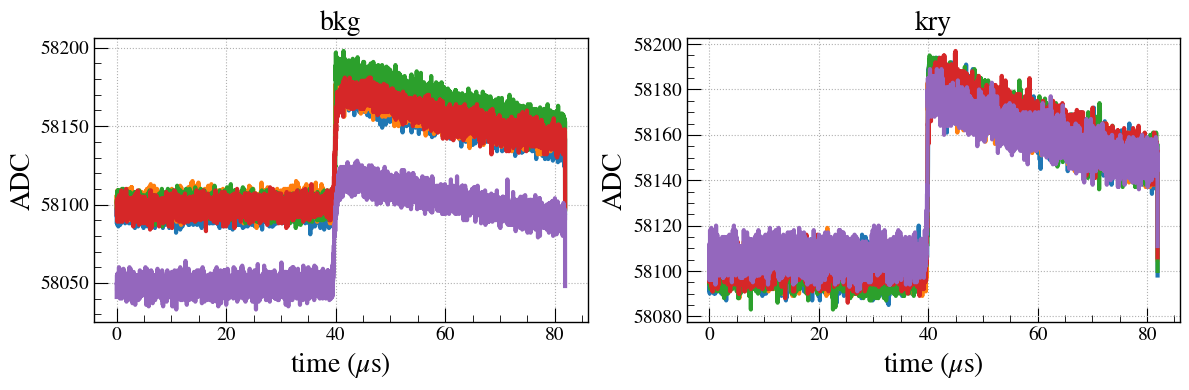

In [ ]:
time = np.arange(raw_wfs['bkg'][0].shape[0]) #clockticks
print(time.shape)
time = time/100 #us
print(time.shape)

# plot time vs wfs for both bkg and kry in a 1x2 grid
fig, ax = plt.subplots(1,2, figsize=(12,4))
for i, sample in enumerate(samples):
    for j, wf in enumerate(raw_wfs[sample]):
        ax[i].plot(time, wf, label='wf'+str(j))
        ax[i].set_title(sample)
        ax[i].set_xlabel(r'time ($\mu$s)')
        ax[i].set_ylabel('ADC')
        #ax[i].legend()
